# **Rare diseases**

### Lectura datos de la API

In [105]:
"""1º Importo las librerías que creo que puedo necesitar en esta tarea."""

# Manejo de datos
import pandas as pd  # Análisis y manipulación de datos en tablas
import numpy as np  # Cálculos numéricos y matrices
import os

# Visualización de datos
import matplotlib.pyplot as plt  # Gráficos básicos en 2D
import seaborn as sns  # Gráficos estadísticos mejorados
import plotly.express as px  # Gráficos interactivos simplificados
import plotly.graph_objects as go  # Control avanzado de gráficos en Plotly
import plotly.io as pio  # Interfaz de entrada/salida de Plotly
import squarify  # Visualización de diagramas de "treemap"

# Web Scraping y APIs
import requests  # Peticiones HTTP para obtener datos de APIs como PubChem

# Quimioinformática y Bioinformática
from rdkit import Chem  # Manejo de estructuras químicas
from rdkit.Chem import DataStructs, AllChem  # Análisis molecular
import pubchempy as pcp  # Interacción con la base de datos de PubChem

Carpeta donde se guardaron los csv extraidos desde la API

In [106]:
carpeta_data = r"C:\Users\maria\ITAcademy\Sprint 10 - Pràctica final\Data\tablas_extraidas_Orphadata"
orphadata = {}
for archivo in os.listdir(carpeta_data):
    if archivo.endswith(".csv"):
        ruta_archivo = os.path.join(carpeta_data, archivo)
        nombre_dataframe = archivo.replace(".csv", "")
        orphadata[nombre_dataframe] = pd.read_csv(ruta_archivo)
orphadata.keys()

dict_keys(['df_diseases', 'df_disease_gene', 'df_genes', 'df_rd_classification', 'df_rd_epidemiology', 'df_rd_functional_consequences', 'df_rd_history', 'df_rd_list', 'df_rd_phenotypes'])

Tras revisar varias columnas, decido adaptar algunos nombres

In [107]:
# Cambiar nombre col hchId
orphadata['df_diseases'].rename(columns={'class_hchId': 'hchId'}, inplace=True)

# Cambiar nombre col Orphacode
orphadata['df_rd_epidemiology'].rename(columns={'Code Disease': 'ORPHAcode'}, inplace=True)

# cambiar nombre gene name y gene symbol
orphadata['df_genes'].rename(columns={'name': 'Gene name'}, inplace=True)
orphadata['df_genes'].rename(columns={'symbol': 'Gene symbol'}, inplace=True)

# Cambiar nombre col Orphacode
orphadata['df_rd_functional_consequences'].rename(columns={'Código Orphanet': 'ORPHAcode'}, inplace=True)

# Cambiar nombre col pref termm
orphadata['df_rd_functional_consequences'].rename(columns={'Nombre': 'disease_name'}, inplace=True)

In [108]:
for nombre_archivo, dataframe in orphadata.items():
    print(f"Archivo: {nombre_archivo}")
    print(f"Total filas = {len(dataframe)}")
    print("Columnas:", dataframe.columns.tolist())
    print("\n")

Archivo: df_diseases
Total filas = 27613
Columnas: ['hchId', 'ORPHAcode', 'preferredTerm']


Archivo: df_disease_gene
Total filas = 8193
Columnas: ['ORPHAcode', 'Disorder name', 'Disorder type', 'Gene symbol', 'Gene name', 'Gene type', 'Gene synonyms', 'Locus', 'Validation source']


Archivo: df_genes
Total filas = 4478
Columnas: ['HGNC', 'Gene name', 'Gene symbol']


Archivo: df_rd_classification
Total filas = 35
Columnas: ['hchId', 'hchTag']


Archivo: df_rd_epidemiology
Total filas = 16119
Columnas: ['ORPHAcode', 'Preferred term', 'Typology', 'PrevalenceType', 'ValMoy', 'PrevalenceClass', 'PrevalenceQualification', 'PrevalenceGeographic', 'PrevalenceValidationStatus', 'Source']


Archivo: df_rd_functional_consequences
Total filas = 1046
Columnas: ['disease_name', 'ORPHAcode', 'Consecuencias Funcionales']


Archivo: df_rd_history
Total filas = 6994
Columnas: ['data', 'AverageAgeOfOnset', 'Date', 'DisorderGroup', 'ORPHAcode', 'OrphanetURL', 'Preferred term', 'TypeOfInheritance', 'Typo

## Tratamiento de datos: **tablas**
Reorganización de la estructura de las tablas

##### Tabla 1: enfermedades

In [109]:
enfermedades = orphadata['df_diseases'].copy()
enfermedades.drop(columns=['hchId'], inplace=True)

enfermedades = enfermedades.drop_duplicates(subset='ORPHAcode')
enfermedades = enfermedades.sort_values(by='ORPHAcode')
enfermedades = enfermedades.rename(columns={'preferredTerm': 'nombre_enfermedad'})
enfermedades

,ORPHAcode,nombre_enfermedad
41,5,Long chain 3-hydroxyacyl-CoA dehydrogenase def...
4661,6,3-methylcrotonyl-CoA carboxylase deficiency
1170,7,3C syndrome
3208,8,"47,XYY syndrome"
3200,9,Tetrasomy X syndrome
...,...,...
3495,689408,Shashi-Pena syndrome
3493,689422,Okur-Chung neurodevelopmental syndrome
21752,689430,Adenoid ameloblastoma
355,689822,Structural heart defects-renal anomalies syndrome


In [110]:
enfermedades.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9673 entries, 41 to 864
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ORPHAcode          9673 non-null   int64 
 1   nombre_enfermedad  9673 non-null   object
dtypes: int64(1), object(1)
memory usage: 226.7+ KB


##### Tabla 2: clasificacion

In [111]:
clasificacion = orphadata['df_diseases'] \
    .merge(orphadata['df_rd_list'], on='ORPHAcode', how='outer') \
    .merge(orphadata['df_rd_classification'], on='hchId', how='left')

clasificacion.drop(columns=['Preferred term'], inplace=True)
clasificacion = clasificacion[['hchId', 'hchTag', 'ORPHAcode', 'preferredTerm']]
clasificacion = clasificacion.rename(columns={'hchId': 'clase_id', 'hchTag': 'clase','preferredTerm': 'nombre_enfermedad'})
clasificacion['clase_id'] = clasificacion['clase_id'].astype('Int64')
clasificacion

,clase_id,clase,ORPHAcode,nombre_enfermedad
0,146,Orphanet classification of rare cardiac diseases,5,Long chain 3-hydroxyacyl-CoA dehydrogenase def...
1,150,Orphanet classification of rare inborn errors ...,5,Long chain 3-hydroxyacyl-CoA dehydrogenase def...
2,156,Orphanet classification of rare genetic diseases,5,Long chain 3-hydroxyacyl-CoA dehydrogenase def...
3,181,Orphanet classification of rare neurological d...,5,Long chain 3-hydroxyacyl-CoA dehydrogenase def...
4,189,Orphanet classification of rare ophthalmic dis...,5,Long chain 3-hydroxyacyl-CoA dehydrogenase def...
...,...,...,...,...
29039,147,Orphanet classification of rare developmental ...,689829,Microphthalmia-motor delay-language delay-brai...
29040,156,Orphanet classification of rare genetic diseases,689829,Microphthalmia-motor delay-language delay-brai...
29041,181,Orphanet classification of rare neurological d...,689829,Microphthalmia-motor delay-language delay-brai...
29042,182,Orphanet classification of rare abdominal surg...,689829,Microphthalmia-motor delay-language delay-brai...


In [112]:
clasificacion[clasificacion['clase_id'].isna()]

,clase_id,clase,ORPHAcode,nombre_enfermedad
99,<NA>,NaN,34,NaN
245,<NA>,NaN,77,NaN
332,<NA>,NaN,103,NaN
341,<NA>,NaN,106,NaN
414,<NA>,NaN,120,NaN
...,...,...,...,...
27463,<NA>,NaN,592888,NaN
27810,<NA>,NaN,619360,NaN
28069,<NA>,NaN,642013,NaN
28091,<NA>,NaN,642737,NaN


In [113]:
clasificacion = clasificacion.dropna(subset=['clase_id'])
clasificacion

,clase_id,clase,ORPHAcode,nombre_enfermedad
0,146,Orphanet classification of rare cardiac diseases,5,Long chain 3-hydroxyacyl-CoA dehydrogenase def...
1,150,Orphanet classification of rare inborn errors ...,5,Long chain 3-hydroxyacyl-CoA dehydrogenase def...
2,156,Orphanet classification of rare genetic diseases,5,Long chain 3-hydroxyacyl-CoA dehydrogenase def...
3,181,Orphanet classification of rare neurological d...,5,Long chain 3-hydroxyacyl-CoA dehydrogenase def...
4,189,Orphanet classification of rare ophthalmic dis...,5,Long chain 3-hydroxyacyl-CoA dehydrogenase def...
...,...,...,...,...
29039,147,Orphanet classification of rare developmental ...,689829,Microphthalmia-motor delay-language delay-brai...
29040,156,Orphanet classification of rare genetic diseases,689829,Microphthalmia-motor delay-language delay-brai...
29041,181,Orphanet classification of rare neurological d...,689829,Microphthalmia-motor delay-language delay-brai...
29042,182,Orphanet classification of rare abdominal surg...,689829,Microphthalmia-motor delay-language delay-brai...


In [114]:
clasificacion.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27613 entries, 0 to 29043
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   clase_id           27613 non-null  Int64 
 1   clase              27613 non-null  object
 2   ORPHAcode          27613 non-null  int64 
 3   nombre_enfermedad  27613 non-null  object
dtypes: Int64(1), int64(1), object(2)
memory usage: 1.1+ MB


##### Tabla 3: genes

In [115]:
genes = orphadata['df_genes'] \
    .merge(orphadata['df_disease_gene'], on='Gene symbol', how='left')
genes = genes.drop(columns=['Gene name_y', 'ORPHAcode', 'Disorder name', 'Disorder type', 'Validation source'])
genes = genes.rename(columns={'HGNC': 'hgnc_id', 'Gene name_x': 'nombre_gen', 'Gene symbol': 'simbolo_gen', 'Gene type': 'tipo_gen', 'Gene synonyms': 'sinonimos', 'Locus': 'locus'})
genes = genes[['hgnc_id', 'simbolo_gen', 'nombre_gen', 'tipo_gen', 'sinonimos', 'locus']]
genes['hgnc_id'] = genes['hgnc_id'].astype('Int64')
genes = genes.drop_duplicates(subset='hgnc_id')
genes = genes.sort_values(by='hgnc_id')
genes

,hgnc_id,simbolo_gen,nombre_gen,tipo_gen,sinonimos,locus
2333,20,AARS1,alanyl-tRNA synthetase 1,gene with protein product,"['AlaRS', 'CMT2N', 'alanine tRNA ligase 1, cyt...","[{'GeneLocus': '16q22.1', 'LocusKey': 1}]"
26,23,ABAT,4-aminobutyrate aminotransferase,gene with protein product,"['4-aminobutyrate transaminase', 'GABA transam...","[{'GeneLocus': '16p13.2', 'LocusKey': 1}]"
173,29,ABCA1,ATP binding cassette subfamily A member 1,gene with protein product,"['TGD', 'Tangier disease']","[{'GeneLocus': '9q31.1', 'LocusKey': 1}]"
178,32,ABCA2,ATP binding cassette subfamily A member 2,gene with protein product,NaN,"[{'GeneLocus': '9q34.3', 'LocusKey': 1}]"
179,33,ABCA3,ATP binding cassette subfamily A member 3,gene with protein product,"['ABC-C', 'EST111653', 'LBM180']","[{'GeneLocus': '16p13.3', 'LocusKey': 1}]"
...,...,...,...,...,...,...
5625,52391,MYMX,"myomixer, myoblast fusion factor",gene with protein product,"['MINION', 'microprotein inducer of fusion', '...","[{'GeneLocus': '6p21.1', 'LocusKey': 1}]"
3006,53647,CIROP,ciliated left-right organizer metallopeptidase,gene with protein product,NaN,"[{'GeneLocus': '14q11.2', 'LocusKey': 1}]"
5815,53924,NOTCH2NLC,notch 2 N-terminal like C,gene with protein product,NaN,"[{'GeneLocus': '1q21.2', 'LocusKey': 1}]"
1744,54925,SLC7A2-IT1,SLC7A2 intronic transcript 1,Non-coding RNA,NaN,"[{'GeneLocus': '8p22', 'LocusKey': 1}]"


In [116]:
genes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4477 entries, 2333 to 507
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   hgnc_id      4476 non-null   Int64 
 1   simbolo_gen  4477 non-null   object
 2   nombre_gen   4477 non-null   object
 3   tipo_gen     4476 non-null   object
 4   sinonimos    3940 non-null   object
 5   locus        4474 non-null   object
dtypes: Int64(1), object(5)
memory usage: 249.2+ KB


##### Tabla 4: enfermedad_gen

In [117]:
enfermedad_gen = orphadata['df_genes'] \
    .merge(orphadata['df_disease_gene'], on='Gene symbol', how='left')
enfermedad_gen = enfermedad_gen.drop(columns=['Gene name_y', 'Disorder name', 'Disorder type', 'HGNC', 'Gene name_x', 'Gene type', 'Gene synonyms', 'Locus'])
enfermedad_gen = enfermedad_gen.rename(columns={'Gene symbol': 'simbolo_gen', 'Validation source': 'fuente_info'})
enfermedad_gen = enfermedad_gen[['ORPHAcode', 'simbolo_gen', 'fuente_info']].sort_values(by='ORPHAcode')
enfermedad_gen['ORPHAcode'] = enfermedad_gen['ORPHAcode'].astype('Int64')
enfermedad_gen

,ORPHAcode,simbolo_gen,fuente_info
4637,5,HADHA,NaN
5382,6,MCCC2,22642865[PMID]_22264772[PMID]
5381,6,MCCC1,22642865[PMID]_22264772[PMID]
3080,7,CCDC22,24916641[PMID]
2075,7,VPS35L,31712251[PMID]
...,...,...,...
6791,689234,RNASEH2B,38229641[PMID]
2787,689397,CSNK2B,34740143[PMID]
158,689408,ASXL2,27693232[PMID]
2816,689430,CTNNB1,35840721[PMID]


In [118]:
enfermedad_gen.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8194 entries, 4637 to 6585
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ORPHAcode    8193 non-null   Int64 
 1   simbolo_gen  8194 non-null   object
 2   fuente_info  7441 non-null   object
dtypes: Int64(1), object(2)
memory usage: 264.1+ KB


##### Tabla 5: fenotipos

In [119]:
fenotipos = orphadata['df_rd_phenotypes']
fenotipos = fenotipos.drop(columns=['ORPHAcode', 'Disorder', 'Frequency'])
fenotipos = fenotipos.rename(columns={'HPO_ID': 'fenotipo_id', 'HPO_Term': 'fenotipo'})
fenotipos

,fenotipo_id,fenotipo
0,HP:0000256,Macrocephaly
1,HP:0001249,Intellectual disability
2,HP:0001250,Seizure
3,HP:0001257,Spasticity
4,HP:0001274,Agenesis of corpus callosum
...,...,...
114956,HP:0011110,Recurrent tonsillitis
114957,HP:0012758,Neurodevelopmental delay
114958,HP:0031692,Severe cytomegalovirus infection
114959,HP:0031693,Severe Epstein Barr virus infection


In [120]:
fenotipos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114961 entries, 0 to 114960
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   fenotipo_id  114961 non-null  object
 1   fenotipo     114961 non-null  object
dtypes: object(2)
memory usage: 1.8+ MB


##### Tabla 6: enfermedad_fenotipo

In [121]:
enfermedad_fenotipo = orphadata['df_rd_phenotypes']
enfermedad_fenotipo = enfermedad_fenotipo.drop(columns=['Disorder', 'HPO_Term'])
enfermedad_fenotipo = enfermedad_fenotipo.rename(columns={'HPO_ID': 'fenotipo_id', 'Frequency': 'frecuencia'})
enfermedad_fenotipo.info()
enfermedad_fenotipo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114961 entries, 0 to 114960
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   ORPHAcode    114961 non-null  int64 
 1   fenotipo_id  114961 non-null  object
 2   frecuencia   114961 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.6+ MB


,ORPHAcode,fenotipo_id,frecuencia
0,58,HP:0000256,Very frequent (99-80%)
1,58,HP:0001249,Very frequent (99-80%)
2,58,HP:0001250,Very frequent (99-80%)
3,58,HP:0001257,Very frequent (99-80%)
4,58,HP:0001274,Very frequent (99-80%)
...,...,...,...
114956,397596,HP:0011110,Occasional (29-5%)
114957,397596,HP:0012758,Occasional (29-5%)
114958,397596,HP:0031692,Occasional (29-5%)
114959,397596,HP:0031693,Occasional (29-5%)


In [122]:
enfermedad_fenotipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114961 entries, 0 to 114960
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   ORPHAcode    114961 non-null  int64 
 1   fenotipo_id  114961 non-null  object
 2   frecuencia   114961 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.6+ MB


##### Tabla 7: epidemiología

In [123]:
epidemiologia = orphadata['df_rd_epidemiology']
epidemiologia = epidemiologia.rename(columns={'Typology': 'tipo_enfermedad', 'PrevalenceType': 'prevalencia_tipo', 'Preferred term': 'nombre_enfermedad', 'ValMoy': 'prevalencia_promedio', 'PrevalenceClass': 'prevalencia_clase', 'PrevalenceQualification': 'calidad_prevalencia', 'PrevalenceGeographic': 'region_prevalencia', 'PrevalenceValidationStatus': 'estado_validacion_prevalencia', 'Source': 'fuente'})
epidemiologia

,ORPHAcode,nombre_enfermedad,tipo_enfermedad,prevalencia_tipo,prevalencia_promedio,prevalencia_clase,calidad_prevalencia,region_prevalencia,estado_validacion_prevalencia,fuente
0,166024,Multiple epiphyseal dysplasia-macrocephaly-fac...,Disease,Cases/families,4.000,NaN,Case(s),Worldwide,Validated,11389160[PMID]_9689990[PMID]_ [EXPERT]
1,166024,Multiple epiphyseal dysplasia-macrocephaly-fac...,Disease,Point prevalence,0.000,<1 / 1 000 000,Class only,Worldwide,Validated,ORPHANET_11389160[PMID]_9689990[PMID]
2,58,Alexander disease,Disease,Annual incidence,0.037,<1 / 1 000 000,Value and class,Japan,Validated,21533827[PMID]_[EXPERT]
3,58,Alexander disease,Disease,Point prevalence,0.000,Unknown,Class only,Worldwide,Not yet validated,ORPHANET
4,166032,Multiple epiphyseal dysplasia-miniepiphyses sy...,Disease,Cases/families,2.000,NaN,Case(s),Worldwide,Validated,15523498[PMID]
...,...,...,...,...,...,...,...,...,...,...
16114,619979,Developmental delay-immunodeficiency-leukoence...,Disease,Point prevalence,0.000,<1 / 1 000 000,Class only,Worldwide,Validated,29018201[PMID]_ORPHANET
16115,619363,NOCARH syndrome,Disease,Cases/families,15.000,NaN,Case(s),Worldwide,Validated,31271789[PMID]_37741518[PMID]
16116,619363,NOCARH syndrome,Disease,Point prevalence,0.000,<1 / 1 000 000,Class only,Worldwide,Validated,31271789[PMID]_37741518[PMID]_ORPHANET
16117,619233,Hereditary persistence of fetal hemoglobin-int...,Disease,Cases/families,9.000,NaN,Case(s),Worldwide,Validated,27453576[PMID]


In [124]:
epidemiologia['prevalencia_clase'].unique()

array([nan, '<1 / 1 000 000', 'Unknown', '1-9 / 1 000 000',
       '1-9 / 100 000', '1-5 / 10 000', '6-9 / 10 000', '>1 / 1000',
       'Not yet documented'], dtype=object)

In [125]:
# Mapeo de clases a valores representativos (aproximaciones usadas por Orphanet y literatura médica)
clase_a_num = {
    "<1 / 1 000 000": 1 / 1000000,
    "1-9 / 1 000 000": 5 / 1000000,
    "1-9 / 100 000": 5 / 100000,
    "1-5 / 10 000": 3 / 10000,
    "6-9 / 10 000": 7.5 / 10000,
    ">1 / 1000": 2 / 1000,  # Asumiendo un valor conservador
    "Unknown": np.nan,
    "Not yet documented": np.nan
}

# Aplicar el mapeo
epidemiologia['prevalencia_clase_num'] = epidemiologia['prevalencia_clase'].map(clase_a_num)

In [126]:
# En los casos en que la prevalencia es muy baja, puedo usar la clase
epidemiologia['prevalencia_final'] = epidemiologia['prevalencia_promedio'].where(
    epidemiologia['prevalencia_promedio'] > 0,
    epidemiologia['prevalencia_clase_num']
)
epidemiologia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16119 entries, 0 to 16118
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ORPHAcode                      16119 non-null  int64  
 1   nombre_enfermedad              16119 non-null  object 
 2   tipo_enfermedad                16119 non-null  object 
 3   prevalencia_tipo               16119 non-null  object 
 4   prevalencia_promedio           16119 non-null  float64
 5   prevalencia_clase              12881 non-null  object 
 6   calidad_prevalencia            16119 non-null  object 
 7   region_prevalencia             16119 non-null  object 
 8   estado_validacion_prevalencia  16116 non-null  object 
 9   fuente                         16117 non-null  object 
 10  prevalencia_clase_num          10901 non-null  float64
 11  prevalencia_final              14138 non-null  float64
dtypes: float64(3), int64(1), object(8)
memory usag

In [127]:
epidemiologia = epidemiologia.drop(columns=['prevalencia_promedio', 'prevalencia_clase', 'prevalencia_clase_num'])
epidemiologia = epidemiologia[['ORPHAcode', 'nombre_enfermedad', 'tipo_enfermedad', 'prevalencia_tipo', 'prevalencia_final', 'region_prevalencia', 'calidad_prevalencia', 'estado_validacion_prevalencia', 'fuente']]

In [128]:
epidemiologia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16119 entries, 0 to 16118
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ORPHAcode                      16119 non-null  int64  
 1   nombre_enfermedad              16119 non-null  object 
 2   tipo_enfermedad                16119 non-null  object 
 3   prevalencia_tipo               16119 non-null  object 
 4   prevalencia_final              14138 non-null  float64
 5   region_prevalencia             16119 non-null  object 
 6   calidad_prevalencia            16119 non-null  object 
 7   estado_validacion_prevalencia  16116 non-null  object 
 8   fuente                         16117 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 1.1+ MB


##### Tabla 8: historia

In [129]:
historia = orphadata['df_rd_history']
historia = historia.drop(columns=['data', 'Date', 'OrphanetURL', 'DisorderGroup'])
historia = historia.rename(columns={'AverageAgeOfOnset': 'edad_media_inicio', 'TypeOfInheritance': 'tipo_herencia', 'Typology': 'tipo_enfermedad', 'Preferred term': 'nombre_enfermedad'})
historia = historia[['ORPHAcode', 'nombre_enfermedad', 'tipo_enfermedad', 'edad_media_inicio', 'tipo_herencia']]
historia

,ORPHAcode,nombre_enfermedad,tipo_enfermedad,edad_media_inicio,tipo_herencia
0,5,Long chain 3-hydroxyacyl-CoA dehydrogenase def...,Disease,"['Infancy', 'Neonatal']",['Autosomal recessive']
1,6,3-methylcrotonyl-CoA carboxylase deficiency,Disease,['All ages'],['Autosomal recessive']
2,7,3C syndrome,Malformation syndrome,"['Antenatal', 'Infancy', 'Neonatal']","['Autosomal recessive', 'X-linked recessive']"
3,8,"47,XYY syndrome",Malformation syndrome,['All ages'],"['Not applicable', 'Unknown']"
4,9,Tetrasomy X syndrome,Malformation syndrome,"['Infancy', 'Neonatal']",NaN
...,...,...,...,...,...
6989,689231,IFH1-related hereditary spastic paraplegia,Disease,NaN,['Autosomal dominant']
6990,689234,RNASEH2B-related hereditary spastic paraplegia,Disease,NaN,['Autosomal recessive']
6991,689397,Poirier-Bienvenue neurodevelopmental syndrome,Malformation syndrome,NaN,['Autosomal recessive']
6992,689408,Shashi-Pena syndrome,Malformation syndrome,NaN,['Autosomal dominant']


In [130]:
historia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6994 entries, 0 to 6993
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ORPHAcode          6994 non-null   int64 
 1   nombre_enfermedad  6994 non-null   object
 2   tipo_enfermedad    6994 non-null   object
 3   edad_media_inicio  6665 non-null   object
 4   tipo_herencia      5639 non-null   object
dtypes: int64(1), object(4)
memory usage: 273.3+ KB


# Dataframes listos para análisis exploratorio

In [131]:
# Imprimir la información de todas las tablas me ayuda a visualizar su contenido desde un punto de vista más genérico
print(enfermedades.info())
print("\n")
print(clasificacion.info())
print("\n")
print(epidemiologia.info())
print("\n")
print(historia.info())
print("\n")
print(enfermedad_gen.info())
print("\n")
print(genes.info())
print("\n")
print(enfermedad_fenotipo.info())
print("\n")
print(fenotipos.info())
print("\n")

<class 'pandas.core.frame.DataFrame'>
Index: 9673 entries, 41 to 864
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ORPHAcode          9673 non-null   int64 
 1   nombre_enfermedad  9673 non-null   object
dtypes: int64(1), object(1)
memory usage: 226.7+ KB
None


<class 'pandas.core.frame.DataFrame'>
Index: 27613 entries, 0 to 29043
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   clase_id           27613 non-null  Int64 
 1   clase              27613 non-null  object
 2   ORPHAcode          27613 non-null  int64 
 3   nombre_enfermedad  27613 non-null  object
dtypes: Int64(1), int64(1), object(2)
memory usage: 1.1+ MB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16119 entries, 0 to 16118
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                     

# Limpieza

##### Tabla *enfermedades*

In [28]:
print(enfermedades.shape)
print(len(enfermedades['ORPHAcode'].unique()))      # 9673 es el total de entradas, no hay valores repetidos
print(enfermedades.isnull().sum())      # 0 0
print(enfermedades['nombre_enfermedad'])    # Voy a mantener los nombres en inglés y dejarlos como están escritos

(9673, 2)
9673
ORPHAcode            0
nombre_enfermedad    0
dtype: int64
41       Long chain 3-hydroxyacyl-CoA dehydrogenase def...
4661           3-methylcrotonyl-CoA carboxylase deficiency
1170                                           3C syndrome
3208                                       47,XYY syndrome
3200                                  Tetrasomy X syndrome
                               ...                        
3495                                  Shashi-Pena syndrome
3493                Okur-Chung neurodevelopmental syndrome
21752                                Adenoid ameloblastoma
355      Structural heart defects-renal anomalies syndrome
864      Microphthalmia-motor delay-language delay-brai...
Name: nombre_enfermedad, Length: 9673, dtype: object


##### Tabla *clasificacion*

In [29]:
print(clasificacion.shape)      # (27613, 4)
print(clasificacion.isnull().sum())     # 0 0 0 0
print(clasificacion['ORPHAcode'].duplicated().sum())    # 17940 son demasiados duplicados --> porque las enfermedades pueden caber en varias clasificaciones

(27613, 4)
clase_id             0
clase                0
ORPHAcode            0
nombre_enfermedad    0
dtype: int64
17940


In [30]:
print(len(clasificacion['clase_id'].unique()))
print(len(clasificacion['clase'].unique()))

35
35


In [31]:
clasificacion.loc[:, "clase"] = clasificacion["clase"].str.replace("Orphanet classification of ", "").str.capitalize()
#para cada fila de la col clase, sustituimos la primera parte por string vacío, y ponemos en mayúscula la primera letra
clasificacion

,clase_id,clase,ORPHAcode,nombre_enfermedad
0,146,Rare cardiac diseases,5,Long chain 3-hydroxyacyl-CoA dehydrogenase def...
1,150,Rare inborn errors of metabolism,5,Long chain 3-hydroxyacyl-CoA dehydrogenase def...
2,156,Rare genetic diseases,5,Long chain 3-hydroxyacyl-CoA dehydrogenase def...
3,181,Rare neurological diseases,5,Long chain 3-hydroxyacyl-CoA dehydrogenase def...
4,189,Rare ophthalmic disorders,5,Long chain 3-hydroxyacyl-CoA dehydrogenase def...
...,...,...,...,...
29039,147,Rare developmental anomalies during embryogenesis,689829,Microphthalmia-motor delay-language delay-brai...
29040,156,Rare genetic diseases,689829,Microphthalmia-motor delay-language delay-brai...
29041,181,Rare neurological diseases,689829,Microphthalmia-motor delay-language delay-brai...
29042,182,Rare abdominal surgical diseases,689829,Microphthalmia-motor delay-language delay-brai...


##### Tabla *epidemiologia*

In [32]:
# Elimino la columna "fuente" ya que no la voy a usar
epidemiologia.drop(columns=['fuente'], inplace=True)
epidemiologia

,ORPHAcode,nombre_enfermedad,tipo_enfermedad,prevalencia_tipo,prevalencia_final,region_prevalencia,calidad_prevalencia,estado_validacion_prevalencia
0,166024,Multiple epiphyseal dysplasia-macrocephaly-fac...,Disease,Cases/families,4.000000,Worldwide,Case(s),Validated
1,166024,Multiple epiphyseal dysplasia-macrocephaly-fac...,Disease,Point prevalence,0.000001,Worldwide,Class only,Validated
2,58,Alexander disease,Disease,Annual incidence,0.037000,Japan,Value and class,Validated
3,58,Alexander disease,Disease,Point prevalence,NaN,Worldwide,Class only,Not yet validated
4,166032,Multiple epiphyseal dysplasia-miniepiphyses sy...,Disease,Cases/families,2.000000,Worldwide,Case(s),Validated
...,...,...,...,...,...,...,...,...
16114,619979,Developmental delay-immunodeficiency-leukoence...,Disease,Point prevalence,0.000001,Worldwide,Class only,Validated
16115,619363,NOCARH syndrome,Disease,Cases/families,15.000000,Worldwide,Case(s),Validated
16116,619363,NOCARH syndrome,Disease,Point prevalence,0.000001,Worldwide,Class only,Validated
16117,619233,Hereditary persistence of fetal hemoglobin-int...,Disease,Cases/families,9.000000,Worldwide,Case(s),Validated


In [33]:
# Analizo la columna "estado_validacion_prevalencia" en busca de nulos y decido si los elimino o no
print("Info: ")
print(epidemiologia.info())

print("Respuestas: ", epidemiologia['estado_validacion_prevalencia'].unique())

print("Nulos: ", epidemiologia['estado_validacion_prevalencia'].isna().sum())

nulos_validacion_pct = round((epidemiologia['estado_validacion_prevalencia'].isna().sum() / len(epidemiologia['estado_validacion_prevalencia']))*100, 3)
print("Nulos en estado de validación: ", nulos_validacion_pct, " %  --> ELIMINAR")

Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16119 entries, 0 to 16118
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ORPHAcode                      16119 non-null  int64  
 1   nombre_enfermedad              16119 non-null  object 
 2   tipo_enfermedad                16119 non-null  object 
 3   prevalencia_tipo               16119 non-null  object 
 4   prevalencia_final              14138 non-null  float64
 5   region_prevalencia             16119 non-null  object 
 6   calidad_prevalencia            16119 non-null  object 
 7   estado_validacion_prevalencia  16116 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 1007.6+ KB
None
Respuestas:  ['Validated' 'Not yet validated' nan]
Nulos:  3
Nulos en estado de validación:  0.019  %  --> ELIMINAR


In [34]:
epidemiologia.loc[epidemiologia['estado_validacion_prevalencia'].isna()]    # Aquí veo los nulos que tengo en esta columna

,ORPHAcode,nombre_enfermedad,tipo_enfermedad,prevalencia_tipo,prevalencia_final,region_prevalencia,calidad_prevalencia,estado_validacion_prevalencia
890,163681,CNTNAP2-related developmental and epileptic en...,Disease,Cases/families,28.000,Worldwide,Case(s),NaN
3595,140,Campomelic dysplasia,Malformation syndrome,Prevalence at birth,1.875,Worldwide,Value and class,NaN
8390,329903,Immunoglobulin-mediated membranoproliferative ...,Clinical subtype,Point prevalence,NaN,Worldwide,Class only,NaN


In [35]:
epidemiologia['estado_validacion_prevalencia'].dropna()     # los elimino

0                Validated
1                Validated
2                Validated
3        Not yet validated
4                Validated
               ...        
16114            Validated
16115            Validated
16116            Validated
16117            Validated
16118            Validated
Name: estado_validacion_prevalencia, Length: 16116, dtype: object

In [36]:
# Analizo la columna "prevalencia_final" en busca de nulos y decido si los elimino o no
print("Nulos: ", epidemiologia['prevalencia_final'].isna().sum())

nulos_prevalencia_final_pct = round((epidemiologia['prevalencia_final'].isna().sum() / len(epidemiologia['prevalencia_final']))*100, 3)
print("Nulos en estado de validación: ", nulos_prevalencia_final_pct, " %  --> ELIMINAR???")    # Son muchos. De momento no los elimino. Reviso las otras columnas a ver cómo afectan

Nulos:  1981
Nulos en estado de validación:  12.29  %  --> ELIMINAR???


In [37]:
# Veo la incidencia de nulos de la prevalencia final en función del tipo:
total = epidemiologia.groupby('prevalencia_tipo').size()
nulos = epidemiologia[epidemiologia['prevalencia_final'].isna()].groupby('prevalencia_tipo').size()
porcentaje_nulos = (nulos / total * 100).round(2)
pd.DataFrame({
    'Total': total,
    'Nulos': nulos,
    '% Nulos': porcentaje_nulos
}).fillna(0)

,Total,Nulos,% Nulos
prevalencia_tipo,,,
Annual incidence,3043,51.0,1.68
Cases/families,3236,0.0,0.00
Lifetime Prevalence,47,2.0,4.26
Point prevalence,7735,1891.0,24.45
Prevalence at birth,2058,37.0,1.80


In [38]:
# Analizo la columna "prevalencia_tipo" en busca de nulos y decido si los elimino o no
print("Nulos: ", epidemiologia['prevalencia_tipo'].isna().sum())

print("Respuestas: ", epidemiologia['prevalencia_tipo'].unique())

Nulos:  0
Respuestas:  ['Cases/families' 'Point prevalence' 'Annual incidence'
 'Prevalence at birth' 'Lifetime Prevalence']


##### Tabla *historia*

In [39]:
historia

,ORPHAcode,nombre_enfermedad,tipo_enfermedad,edad_media_inicio,tipo_herencia
0,5,Long chain 3-hydroxyacyl-CoA dehydrogenase def...,Disease,"['Infancy', 'Neonatal']",['Autosomal recessive']
1,6,3-methylcrotonyl-CoA carboxylase deficiency,Disease,['All ages'],['Autosomal recessive']
2,7,3C syndrome,Malformation syndrome,"['Antenatal', 'Infancy', 'Neonatal']","['Autosomal recessive', 'X-linked recessive']"
3,8,"47,XYY syndrome",Malformation syndrome,['All ages'],"['Not applicable', 'Unknown']"
4,9,Tetrasomy X syndrome,Malformation syndrome,"['Infancy', 'Neonatal']",NaN
...,...,...,...,...,...
6989,689231,IFH1-related hereditary spastic paraplegia,Disease,NaN,['Autosomal dominant']
6990,689234,RNASEH2B-related hereditary spastic paraplegia,Disease,NaN,['Autosomal recessive']
6991,689397,Poirier-Bienvenue neurodevelopmental syndrome,Malformation syndrome,NaN,['Autosomal recessive']
6992,689408,Shashi-Pena syndrome,Malformation syndrome,NaN,['Autosomal dominant']


In [40]:
print(historia.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6994 entries, 0 to 6993
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ORPHAcode          6994 non-null   int64 
 1   nombre_enfermedad  6994 non-null   object
 2   tipo_enfermedad    6994 non-null   object
 3   edad_media_inicio  6665 non-null   object
 4   tipo_herencia      5639 non-null   object
dtypes: int64(1), object(4)
memory usage: 273.3+ KB
None


In [41]:
historia['tipo_enfermedad'].unique()        # No voy a usar estos datos para este proyecto

array(['Disease', 'Malformation syndrome', 'Clinical subtype',
       'Clinical group', 'Morphological anomaly', 'Category',
       'Etiological subtype', 'Clinical syndrome', 'Biological anomaly',
       'Particular clinical situation in a disease or syndrome',
       'Histopathological subtype'], dtype=object)

In [42]:
print(historia['edad_media_inicio'].apply(str).unique())       # hay muchos valores para cada enfermedad. Voy a tratar de dividirlos en columnas para marcar true false

["['Infancy', 'Neonatal']" "['All ages']"
 "['Antenatal', 'Infancy', 'Neonatal']"
 "['Adolescent', 'Childhood', 'Infancy', 'Neonatal']" "['Neonatal']"
 "['Childhood', 'Infancy']" "['Infancy']" "['Childhood']"
 "['Childhood', 'Infancy', 'Neonatal']"
 "['Adolescent', 'Adult', 'Childhood', 'Infancy', 'Neonatal']"
 "['Adolescent', 'Adult']"
 "['Adolescent', 'Adult', 'Childhood', 'Elderly']"
 "['Antenatal', 'Neonatal']" "['Adult', 'Infancy']"
 "['Adolescent', 'Childhood']" "['Adult', 'Elderly']" "['Adult']"
 "['Adolescent', 'Adult', 'Childhood', 'Infancy']"
 "['Antenatal', 'Childhood', 'Infancy', 'Neonatal']"
 "['Adolescent', 'Adult', 'Antenatal', 'Childhood', 'Infancy', 'Neonatal']"
 "['Adolescent', 'Adult', 'Childhood']" "['Antenatal']"
 "['Adult', 'Childhood']" "['Adolescent', 'Adult', 'Elderly']"
 "['Adult', 'Neonatal']" "['No data available']" 'nan'
 "['Adolescent', 'Antenatal', 'Childhood', 'Infancy', 'Neonatal']"
 "['Adolescent', 'Antenatal', 'Infancy', 'Neonatal']" "['Adolescent']"


In [43]:
"""Voy a hacer una columna para separar las enfermedades según la edad media de inicio"""
import ast

def safe_literal_eval(x):
    # Si es una lista, la dejamos tal cual
    if isinstance(x, list):
        return x
    # Si es nulo o vacío
    if pd.isna(x):
        return []
    # Si es string
    if isinstance(x, str):
        x_clean = x.strip()
        if x_clean in ["", "[]"]:
            return []
        try:
            return ast.literal_eval(x_clean)
        except (ValueError, SyntaxError):
            return []
    # Si es cualquier otra cosa (por si acaso)
    return []

# Aplicar limpieza a la columna
historia['edad_media_inicio'] = historia['edad_media_inicio'].apply(safe_literal_eval)

# Obtener todas las etapas únicas
etapas = set()
historia['edad_media_inicio'].apply(etapas.update)

# Crear DataFrame binario por etapa
edad_inicio_binaria = historia[['ORPHAcode']].copy()

for etapa in etapas:
    edad_inicio_binaria[etapa] = historia['edad_media_inicio'].apply(lambda x: int(etapa in x))

# Mostrar resumen
print(edad_inicio_binaria.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6994 entries, 0 to 6993
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ORPHAcode          6994 non-null   int64
 1   Elderly            6994 non-null   int64
 2   Neonatal           6994 non-null   int64
 3   Adolescent         6994 non-null   int64
 4   All ages           6994 non-null   int64
 5   No data available  6994 non-null   int64
 6   Infancy            6994 non-null   int64
 7   Childhood          6994 non-null   int64
 8   Antenatal          6994 non-null   int64
 9   Adult              6994 non-null   int64
dtypes: int64(10)
memory usage: 546.5 KB
None


In [44]:
print(historia['tipo_herencia'].unique())       # hay muchos valores para cada enfermedad. Voy a tratar de dividirlos en columnas para marcar true false

["['Autosomal recessive']" "['Autosomal recessive', 'X-linked recessive']"
 "['Not applicable', 'Unknown']" nan "['Autosomal dominant']"
 "['X-linked recessive']"
 "['Autosomal dominant', 'Autosomal recessive', 'Not applicable']"
 "['Autosomal dominant', 'Autosomal recessive']"
 "['Autosomal dominant', 'Not applicable']" "['Unknown']"
 "['X-linked dominant']" "['Not applicable', 'X-linked recessive']"
 "['Multigenic/multifactorial']"
 "['Autosomal dominant', 'Autosomal recessive', 'X-linked dominant']"
 "['Not applicable']"
 "['Autosomal dominant', 'Autosomal recessive', 'X-linked recessive']"
 "['Multigenic/multifactorial', 'Not applicable']"
 "['Mitochondrial inheritance']" "['Autosomal recessive', 'Oligogenic']"
 "['Autosomal dominant', 'Unknown']"
 "['Autosomal dominant', 'Autosomal recessive', 'Mitochondrial inheritance', 'X-linked recessive']"
 "['Autosomal dominant', 'Autosomal recessive', 'X-linked dominant', 'X-linked recessive']"
 "['Multigenic/multifactorial', 'Unknown']"
 "

In [45]:
# Paso 1: convertir strings en listas reales
historia['tipo_herencia'] = historia['tipo_herencia'].apply(
    lambda x: ast.literal_eval(x) if pd.notnull(x) and isinstance(x, str) else []
)

# Paso 2: obtener todos los tipos únicos
tipos = set()
historia['tipo_herencia'].apply(tipos.update)

# Paso 3: crear un nuevo DataFrame solo con ORPHAcode y columnas binarias
tipos_de_herencias_binarias = historia[['ORPHAcode']].copy()

for tipo in tipos:
    tipos_de_herencias_binarias[tipo] = historia['tipo_herencia'].apply(lambda x: int(tipo in x))

# Mostrar los primeros registros
print(tipos_de_herencias_binarias.info())       # Datos muy complejos que aportan poco a mi proyecto. No los voy a usar

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6994 entries, 0 to 6993
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   ORPHAcode                  6994 non-null   int64
 1   X-linked recessive         6994 non-null   int64
 2   Mitochondrial inheritance  6994 non-null   int64
 3   Multigenic/multifactorial  6994 non-null   int64
 4   Autosomal dominant         6994 non-null   int64
 5   Semi-dominant              6994 non-null   int64
 6   Unknown                    6994 non-null   int64
 7   Oligogenic                 6994 non-null   int64
 8   Y-linked                   6994 non-null   int64
 9   No data available          6994 non-null   int64
 10  X-linked dominant          6994 non-null   int64
 11  Not applicable             6994 non-null   int64
 12  Autosomal recessive        6994 non-null   int64
 13  Not yet documented         6994 non-null   int64
dtypes: int64(14)
memory usag

##### Tablas *enfermedad_gen* y *genes*

In [46]:
print(enfermedad_gen.info())
print(genes.info())

<class 'pandas.core.frame.DataFrame'>
Index: 8194 entries, 4637 to 6585
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ORPHAcode    8193 non-null   Int64 
 1   simbolo_gen  8194 non-null   object
 2   fuente_info  7441 non-null   object
dtypes: Int64(1), object(2)
memory usage: 264.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 4477 entries, 2333 to 507
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   hgnc_id      4476 non-null   Int64 
 1   simbolo_gen  4477 non-null   object
 2   nombre_gen   4477 non-null   object
 3   tipo_gen     4476 non-null   object
 4   sinonimos    3940 non-null   object
 5   locus        4474 non-null   object
dtypes: Int64(1), object(5)
memory usage: 249.2+ KB
None


In [47]:
# Eliminar filas con ORPHAcode nulo
enfermedad_gen = enfermedad_gen[enfermedad_gen['ORPHAcode'].notna()]
enfermedad_gen = enfermedad_gen.drop(columns=['fuente_info'])

In [48]:
enfermedad_gen.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8193 entries, 4637 to 2816
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ORPHAcode    8193 non-null   Int64 
 1   simbolo_gen  8193 non-null   object
dtypes: Int64(1), object(1)
memory usage: 200.0+ KB


In [49]:
genes.head()

,hgnc_id,simbolo_gen,nombre_gen,tipo_gen,sinonimos,locus
2333,20,AARS1,alanyl-tRNA synthetase 1,gene with protein product,"['AlaRS', 'CMT2N', 'alanine tRNA ligase 1, cyt...","[{'GeneLocus': '16q22.1', 'LocusKey': 1}]"
26,23,ABAT,4-aminobutyrate aminotransferase,gene with protein product,"['4-aminobutyrate transaminase', 'GABA transam...","[{'GeneLocus': '16p13.2', 'LocusKey': 1}]"
173,29,ABCA1,ATP binding cassette subfamily A member 1,gene with protein product,"['TGD', 'Tangier disease']","[{'GeneLocus': '9q31.1', 'LocusKey': 1}]"
178,32,ABCA2,ATP binding cassette subfamily A member 2,gene with protein product,NaN,"[{'GeneLocus': '9q34.3', 'LocusKey': 1}]"
179,33,ABCA3,ATP binding cassette subfamily A member 3,gene with protein product,"['ABC-C', 'EST111653', 'LBM180']","[{'GeneLocus': '16p13.3', 'LocusKey': 1}]"


In [50]:
genes['tipo_gen'].unique()

array(['gene with protein product', 'Disorder-associated locus',
       'Non-coding RNA', nan], dtype=object)

In [51]:
genes = genes.drop(columns= ['hgnc_id', 'sinonimos', 'locus', 'tipo_gen'])
genes

,simbolo_gen,nombre_gen
2333,AARS1,alanyl-tRNA synthetase 1
26,ABAT,4-aminobutyrate aminotransferase
173,ABCA1,ATP binding cassette subfamily A member 1
178,ABCA2,ATP binding cassette subfamily A member 2
179,ABCA3,ATP binding cassette subfamily A member 3
...,...,...
5625,MYMX,"myomixer, myoblast fusion factor"
3006,CIROP,ciliated left-right organizer metallopeptidase
5815,NOTCH2NLC,notch 2 N-terminal like C
1744,SLC7A2-IT1,SLC7A2 intronic transcript 1


In [52]:
#Tabla final de enfermedades genéticas con los datos que voy a usar
enfermedades_geneticas = enfermedad_gen.merge(genes, how='left', on='simbolo_gen')
print(enfermedades_geneticas.info())
enfermedades_geneticas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8193 entries, 0 to 8192
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ORPHAcode    8193 non-null   Int64 
 1   simbolo_gen  8193 non-null   object
 2   nombre_gen   8191 non-null   object
dtypes: Int64(1), object(2)
memory usage: 200.2+ KB
None


,ORPHAcode,simbolo_gen,nombre_gen
0,5,HADHA,hydroxyacyl-CoA dehydrogenase trifunctional mu...
1,6,MCCC2,methylcrotonyl-CoA carboxylase subunit 2
2,6,MCCC1,methylcrotonyl-CoA carboxylase subunit 1
3,7,CCDC22,coiled-coil domain containing 22
4,7,VPS35L,VPS35 endosomal protein sorting factor like
...,...,...,...
8188,689231,IFIH1,interferon induced with helicase C domain 1
8189,689234,RNASEH2B,ribonuclease H2 subunit B
8190,689397,CSNK2B,casein kinase 2 beta
8191,689408,ASXL2,ASXL transcriptional regulator 2


In [53]:
"""Las enfermedades pueden afectar a más de un gen"""
genes_por_enfermedad = enfermedades_geneticas.groupby('ORPHAcode').size()
max_genes = genes_por_enfermedad.max()
print(f"Máximo número de genes asociados a una enfermedad: {max_genes}")
enfermedades_max_genes = genes_por_enfermedad[genes_por_enfermedad == max_genes]
print(enfermedades_max_genes)

Máximo número de genes asociados a una enfermedad: 108
ORPHAcode
528084    108
dtype: int64


In [54]:
""""De la misma forma, un gen puede estar asociado a diferentes enfermesades"""
enfermedades_por_gen = enfermedades_geneticas.groupby('simbolo_gen').size()
max_enfermedades = enfermedades_por_gen.max()
print(f"Máximo número de enfermedades asociados a un gen: {max_enfermedades}")
genes_max_enfermedades = enfermedades_por_gen[enfermedades_por_gen == max_enfermedades]
print(genes_max_enfermedades)

Máximo número de enfermedades asociados a un gen: 21
simbolo_gen
LMNA    21
TP53    21
dtype: int64


In [55]:
top_genes = enfermedades_por_gen.sort_values(ascending=False).head(10)
top_genes

simbolo_gen
TP53      21
LMNA      21
KIT       19
HBB       19
COL2A1    18
FGFR1     17
PTEN      16
PIK3CA    14
PAX6      13
SHH       13
dtype: int64

In [56]:
top_enfermedades = genes_por_enfermedad.sort_values(ascending=False).head(10)
top_enfermedades

ORPHAcode
528084    108
791        85
90636      74
88616      55
442835     52
154        52
90635      50
244        49
178469     48
803        36
dtype: int64

In [57]:
top_enfermedades = genes_por_enfermedad.sort_values(ascending=False).head(10).reset_index()
top_enfermedades.columns = ['ORPHAcode', 'num_genes']
top_enfermedades = top_enfermedades.merge(enfermedades, on='ORPHAcode', how='left')
top_enfermedades

,ORPHAcode,num_genes,nombre_enfermedad
0,528084,108,Non-specific syndromic intellectual disability
1,791,85,Retinitis pigmentosa
2,90636,74,Rare autosomal recessive non-syndromic sensori...
3,88616,55,Autosomal recessive non-syndromic intellectual...
4,442835,52,Non-specific early-onset epileptic encephalopathy
5,154,52,Familial isolated dilated cardiomyopathy
6,90635,50,Rare autosomal dominant non-syndromic sensorin...
7,244,49,Primary ciliary dyskinesia
8,178469,48,Autosomal dominant non-syndromic intellectual ...
9,803,36,Amyotrophic lateral sclerosis


In [58]:
from Bio import Entrez
Entrez.email = "A.N.Other@example.com"
for gene in genes:
    search_handle = Entrez.esearch(db="gene", term=f"{gene}[Gene Name] AND Homo sapiens[Organism]")
    search_record = Entrez.read(search_handle)
    search_handle.close()
    ...

In [59]:
"""Curiosidad que se puede añadir: uso de biopandas para cruzar información sobre genes"""

from Bio import Entrez

Entrez.email = "A.N.Other@example.com"

# Genes a consultar
genes = ['LMNA', 'TP53']
gene_summaries = []

for gene in genes:
    # Buscar ID de gen en NCBI Gene
    search_handle = Entrez.esearch(db="gene", term=f"{gene}[Gene Name] AND Homo sapiens[Organism]")
    search_record = Entrez.read(search_handle)
    search_handle.close()

    if search_record['IdList']:
        gene_id = search_record['IdList'][0]

        # Obtener resumen del gen
        fetch_handle = Entrez.efetch(db="gene", id=gene_id, rettype="xml")
        fetch_record = Entrez.read(fetch_handle)
        fetch_handle.close()

        gene_entry = fetch_record[0]
        gene_info = {
            'Gene Symbol': gene_entry['Entrezgene_gene']['Gene-ref']['Gene-ref_locus'],
            'Full Name': gene_entry['Entrezgene_gene']['Gene-ref'].get('Gene-ref_desc', 'N/A'),
            'Chromosome': gene_entry['Entrezgene_source']['BioSource']['BioSource_subtype'][0]['SubSource_name'],
            'Summary': gene_entry.get('Entrezgene_summary', 'No summary available.'),
            'NCBI Link': f"https://www.ncbi.nlm.nih.gov/gene/{gene_id}"
        }
        gene_summaries.append(gene_info)

# Mostrar como DataFrame para visualización clara
pd.DataFrame(gene_summaries)

,Gene Symbol,Full Name,Chromosome,Summary,NCBI Link
0,LMNA,lamin A/C,1,The protein encoded by this gene is part of th...,https://www.ncbi.nlm.nih.gov/gene/4000
1,TP53,tumor protein p53,17,This gene encodes a tumor suppressor protein c...,https://www.ncbi.nlm.nih.gov/gene/7157


##### Tabla *enfermedad_fenotipo*

In [60]:
enfermedad_fenotipo.info()
duplicados = enfermedad_fenotipo.duplicated()
print(f"Número de duplicados exactos: {duplicados.sum()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114961 entries, 0 to 114960
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   ORPHAcode    114961 non-null  int64 
 1   fenotipo_id  114961 non-null  object
 2   frecuencia   114961 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.6+ MB
Número de duplicados exactos: 0


In [61]:
print(enfermedad_fenotipo['frecuencia'].unique())

['Very frequent (99-80%)' 'Frequent (79-30%)' 'Occasional (29-5%)'
 'Very rare (<4-1%)' 'Excluded (0%)' 'Obligate (100%)']


In [62]:
enfermedad_fenotipo.isna().sum()

ORPHAcode      0
fenotipo_id    0
frecuencia     0
dtype: int64

##### Tabla *fenotipos*

In [63]:
fenotipos

,fenotipo_id,fenotipo
0,HP:0000256,Macrocephaly
1,HP:0001249,Intellectual disability
2,HP:0001250,Seizure
3,HP:0001257,Spasticity
4,HP:0001274,Agenesis of corpus callosum
...,...,...
114956,HP:0011110,Recurrent tonsillitis
114957,HP:0012758,Neurodevelopmental delay
114958,HP:0031692,Severe cytomegalovirus infection
114959,HP:0031693,Severe Epstein Barr virus infection


In [64]:
fenotipos.info()
duplicados = fenotipos['fenotipo_id'].duplicated()
print(f"Número de duplicados exactos: {duplicados.sum()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114961 entries, 0 to 114960
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   fenotipo_id  114961 non-null  object
 1   fenotipo     114961 non-null  object
dtypes: object(2)
memory usage: 1.8+ MB
Número de duplicados exactos: 106361


In [65]:
duplicados_fenotipos = fenotipos[fenotipos.duplicated(subset='fenotipo_id', keep=False)]
print(f"Número total de duplicados (por ID): {duplicados_fenotipos.shape[0]}")
duplicados_fenotipos.sort_values(by='fenotipo_id').head(10)

Número total de duplicados (por ID): 112520


,fenotipo_id,fenotipo
49003,HP:0000002,Abnormality of body height
36609,HP:0000002,Abnormality of body height
113444,HP:0000002,Abnormality of body height
5846,HP:0000003,Multicystic kidney dysplasia
90858,HP:0000003,Multicystic kidney dysplasia
7112,HP:0000003,Multicystic kidney dysplasia
55107,HP:0000003,Multicystic kidney dysplasia
54090,HP:0000003,Multicystic kidney dysplasia
15785,HP:0000003,Multicystic kidney dysplasia
90514,HP:0000003,Multicystic kidney dysplasia


In [66]:
print(len(fenotipos['fenotipo_id'].unique()))
print(len(fenotipos['fenotipo'].unique()))

8600
8595


In [67]:
fenotipos_limpio = fenotipos.drop_duplicates(subset='fenotipo_id')
print(len(fenotipos_limpio['fenotipo_id'].unique()))
print(len(fenotipos_limpio['fenotipo'].unique()))
fenotipos_limpio.info()

8600
8595
<class 'pandas.core.frame.DataFrame'>
Index: 8600 entries, 0 to 114949
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   fenotipo_id  8600 non-null   object
 1   fenotipo     8600 non-null   object
dtypes: object(2)
memory usage: 201.6+ KB


In [68]:
duplicados_conflictivos = fenotipos.groupby('fenotipo_id')['fenotipo'].nunique()
conflictivos = duplicados_conflictivos[duplicados_conflictivos > 1]

print(f"Número de IDs con conflicto: {len(conflictivos)}")
print(conflictivos)

Número de IDs con conflicto: 0
Series([], Name: fenotipo, dtype: int64)


In [69]:
fenotipos_limpio = fenotipos.drop_duplicates(subset='fenotipo_id')
print("IDs únicos: ", fenotipos_limpio['fenotipo_id'].nunique())
print("Descripciones únicas: ", fenotipos_limpio['fenotipo'].nunique())
print("Nulos en fenotipo_id: ", fenotipos_limpio['fenotipo_id'].isna().sum())
print("Nulos en fenotipo: ", fenotipos_limpio['fenotipo'].isna().sum())
fenotipos_limpio.info()

IDs únicos:  8600
Descripciones únicas:  8595
Nulos en fenotipo_id:  0
Nulos en fenotipo:  0
<class 'pandas.core.frame.DataFrame'>
Index: 8600 entries, 0 to 114949
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   fenotipo_id  8600 non-null   object
 1   fenotipo     8600 non-null   object
dtypes: object(2)
memory usage: 201.6+ KB


In [70]:
fenotipos_limpio

,fenotipo_id,fenotipo
0,HP:0000256,Macrocephaly
1,HP:0001249,Intellectual disability
2,HP:0001250,Seizure
3,HP:0001257,Spasticity
4,HP:0001274,Agenesis of corpus callosum
...,...,...
114825,HP:0033643,Increased circulating very long-chain fatty ac...
114912,HP:0033720,EEG with occipital epileptiform discharges
114933,HP:0006781,Hurthle cell thyroid adenoma
114936,HP:0032203,Lymphoid nodular hyperplasia


In [71]:
fenotipos_final = enfermedad_fenotipo \
    .merge(fenotipos_limpio, on='fenotipo_id', how='left')
fenotipos_final

,ORPHAcode,fenotipo_id,frecuencia,fenotipo
0,58,HP:0000256,Very frequent (99-80%),Macrocephaly
1,58,HP:0001249,Very frequent (99-80%),Intellectual disability
2,58,HP:0001250,Very frequent (99-80%),Seizure
3,58,HP:0001257,Very frequent (99-80%),Spasticity
4,58,HP:0001274,Very frequent (99-80%),Agenesis of corpus callosum
...,...,...,...,...
114956,397596,HP:0011110,Occasional (29-5%),Recurrent tonsillitis
114957,397596,HP:0012758,Occasional (29-5%),Neurodevelopmental delay
114958,397596,HP:0031692,Occasional (29-5%),Severe cytomegalovirus infection
114959,397596,HP:0031693,Occasional (29-5%),Severe Epstein Barr virus infection


In [72]:
fenotipos_final['frecuencia'].unique()

array(['Very frequent (99-80%)', 'Frequent (79-30%)',
       'Occasional (29-5%)', 'Very rare (<4-1%)', 'Excluded (0%)',
       'Obligate (100%)'], dtype=object)

In [73]:
# Paso 1: obtener todas las frecuencias únicas
frecuencias = fenotipos_final['frecuencia'].dropna().unique()

# Paso 2: crear tabla binaria de frecuencias por ORPHAcode y fenotipo_id
fenotipos_frecuencia_binaria = fenotipos_final[['ORPHAcode', 'fenotipo_id']].copy()

# Paso 3: asignar columnas binarias
for f in frecuencias:
    fenotipos_frecuencia_binaria[f] = (fenotipos_final['frecuencia'] == f).astype(int)

fenotipos_frecuencia_binaria.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114961 entries, 0 to 114960
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   ORPHAcode               114961 non-null  int64 
 1   fenotipo_id             114961 non-null  object
 2   Very frequent (99-80%)  114961 non-null  int64 
 3   Frequent (79-30%)       114961 non-null  int64 
 4   Occasional (29-5%)      114961 non-null  int64 
 5   Very rare (<4-1%)       114961 non-null  int64 
 6   Excluded (0%)           114961 non-null  int64 
 7   Obligate (100%)         114961 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 7.0+ MB


In [74]:
nombre_frecuencias = {
    'Obligate (100%)': 'Siempre (100 %)',
    'Very frequent (99-80%)': 'Muy frecuente (80 - 99 %)',
    'Frequent (79-30%)': 'Frecuente (30 - 79 %)',
    'Occasional (29-5%)': 'Ocasional (5 - 29 %)',
    'Very rare (<4-1%)': 'Muy rara (1 - 4 %)',
    'Excluded (0%)': 'Excluida (0 %)'
}
for old, new in nombre_frecuencias.items():
    fenotipos_frecuencia_binaria.rename(columns={old: new}, inplace=True)
fenotipos_frecuencia_binaria

,ORPHAcode,fenotipo_id,Muy frecuente (80 - 99 %),Frecuente (30 - 79 %),Ocasional (5 - 29 %),Muy rara (1 - 4 %),Excluida (0 %),Siempre (100 %)
0,58,HP:0000256,1,0,0,0,0,0
1,58,HP:0001249,1,0,0,0,0,0
2,58,HP:0001250,1,0,0,0,0,0
3,58,HP:0001257,1,0,0,0,0,0
4,58,HP:0001274,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
114956,397596,HP:0011110,0,0,1,0,0,0
114957,397596,HP:0012758,0,0,1,0,0,0
114958,397596,HP:0031692,0,0,1,0,0,0
114959,397596,HP:0031693,0,0,1,0,0,0


In [75]:
# Datos
fenotipos_por_enfermedad = fenotipos_final.groupby('ORPHAcode').size()
max_fenotipos = fenotipos_por_enfermedad.max()
print(f"Máximo número de fenotipos asociados a una enfermedad: {max_fenotipos}")
enfermedades_max_fenotipos = fenotipos_por_enfermedad[fenotipos_por_enfermedad == max_fenotipos]
print(enfermedades_max_fenotipos)

Máximo número de fenotipos asociados a una enfermedad: 187
ORPHAcode
904    187
dtype: int64


In [76]:
enfermedades_por_fenotipo = fenotipos_final.groupby('fenotipo_id').size()
max_enfermedades = enfermedades_por_fenotipo.max()
print(f"Máximo número de enfermedades asociados a un gen: {max_enfermedades}")
fenotipos_max_enfermedades = enfermedades_por_fenotipo[enfermedades_por_fenotipo == max_enfermedades]
print(fenotipos_max_enfermedades)

Máximo número de enfermedades asociados a un gen: 1035
fenotipo_id
HP:0001250    1035
dtype: int64


# Visualizaciones

##### Gráficas *enfermedades*

##### Gráficas *clasificación*

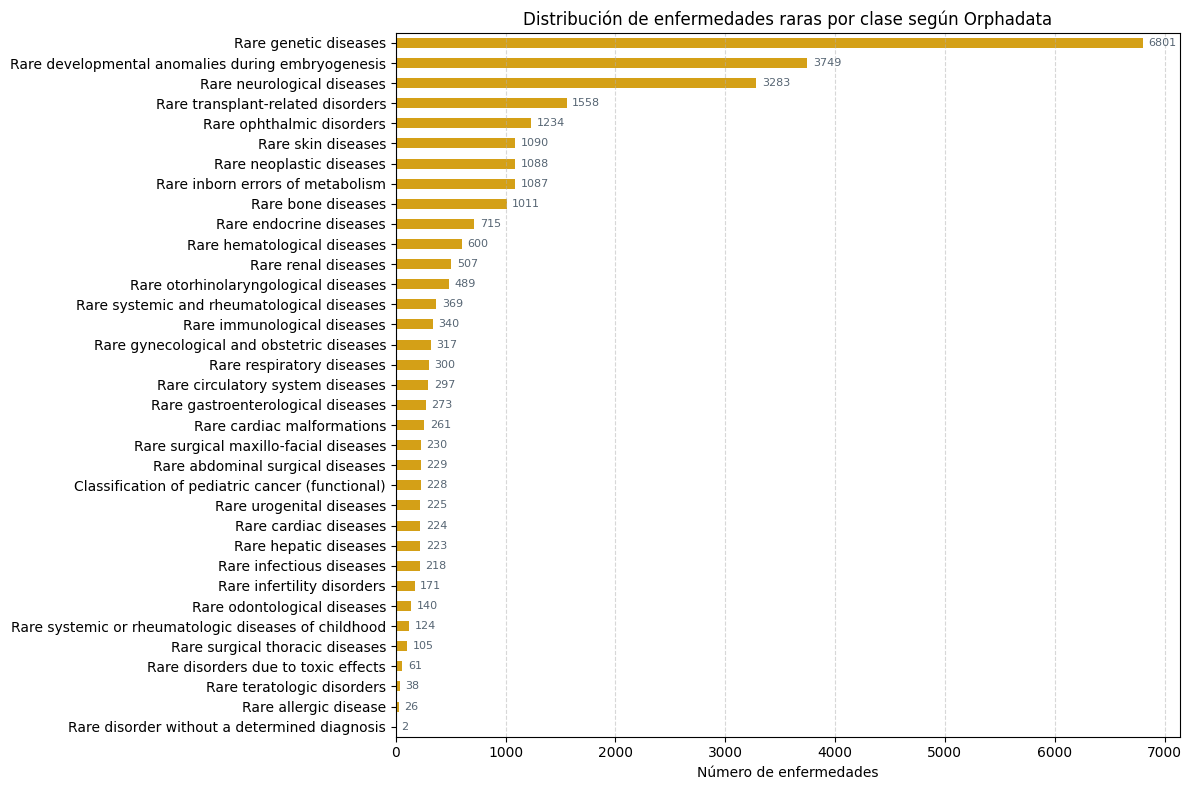

In [77]:
conteo_clases = clasificacion.groupby("clase")["nombre_enfermedad"].count().sort_values()

fig, ax = plt.subplots(figsize=(12, 8))
conteo_clases.plot.barh(
    ax=ax,
    legend=False,
    color="#d4a017",
    title="Distribución de enfermedades raras por clase según Orphadata"
)

ax.set_xlabel("Número de enfermedades")
ax.set_ylabel("")
plt.tight_layout()
plt.grid(axis="x", linestyle="--", alpha=0.5)

# Etiquetas de valores
for i, v in enumerate(conteo_clases.values):
    plt.text(v + 50, i, f"{v}", va='center', fontsize=8, color='#566573')

plt.show()

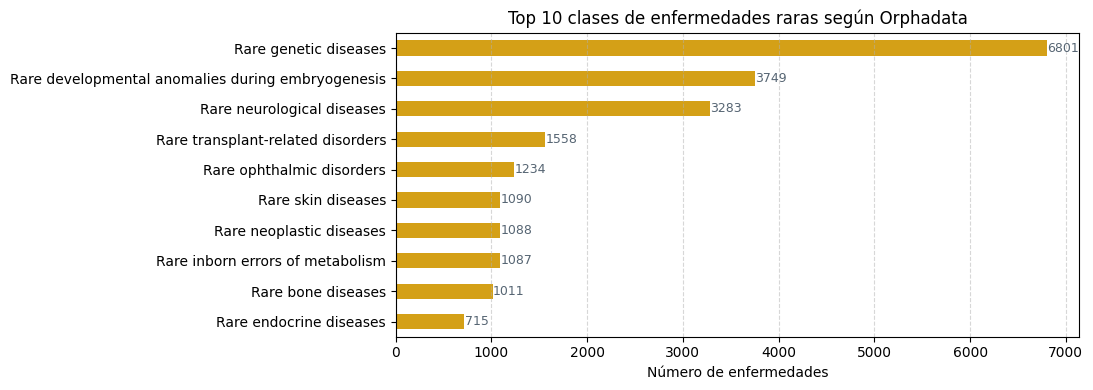

In [78]:
"""Top 10 clases"""
# Top 10 clases con más enfermedades
top_10_clases = clasificacion.groupby("clase")["nombre_enfermedad"].count().sort_values(ascending=False).head(10)

# Gráfico horizontal
fig, ax = plt.subplots(figsize=(11, 4))
top_10_clases.sort_values().plot.barh(
    ax=ax,
    color="#d4a017",
    title="Top 10 clases de enfermedades raras según Orphadata"
)

ax.set_xlabel("Número de enfermedades")
ax.set_ylabel("")
plt.tight_layout()
plt.grid(axis="x", linestyle="--", alpha=0.5)

# Etiquetas de valor
for i, v in enumerate(top_10_clases.sort_values().values):
    plt.text(v + 5, i, f"{v}", va='center', fontsize=9, color='#566573')

plt.show()

In [79]:
clasificaciones_agregadas = clasificacion.groupby('ORPHAcode')['clase'].apply(list).reset_index()

print(clasificaciones_agregadas.head())

   ORPHAcode                                              clase
0          5  [Rare cardiac diseases, Rare inborn errors of ...
1          6  [Rare inborn errors of metabolism, Rare geneti...
2          7  [Rare developmental anomalies during embryogen...
3          8  [Rare developmental anomalies during embryogen...
4          9  [Rare developmental anomalies during embryogen...


   ORPHAcode  cantidad_clasificaciones
0          5                         7
1          6                         2
2          7                         3
3          8                         2
4          9                         5


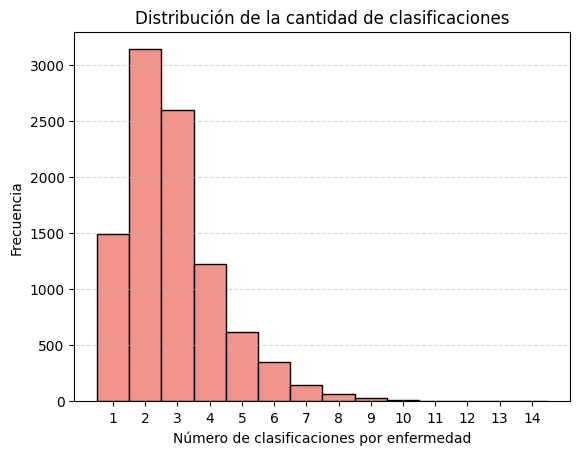

In [80]:
conteo_clasificacion = clasificacion.groupby('ORPHAcode').size().reset_index(name='cantidad_clasificaciones')
max_val = conteo_clasificacion['cantidad_clasificaciones'].max()
bins = np.arange(1, max_val + 2)  # +2 porque el último bin es exclusivo
print(conteo_clasificacion.head())

plt.hist(conteo_clasificacion['cantidad_clasificaciones'], bins=bins, edgecolor='black', align='left', color='#f1948a')
plt.xlabel('Número de clasificaciones por enfermedad')
plt.ylabel('Frecuencia')
plt.title('Distribución de la cantidad de clasificaciones')
plt.xticks(bins[:-1])  # Mostrar solo los valores exactos
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

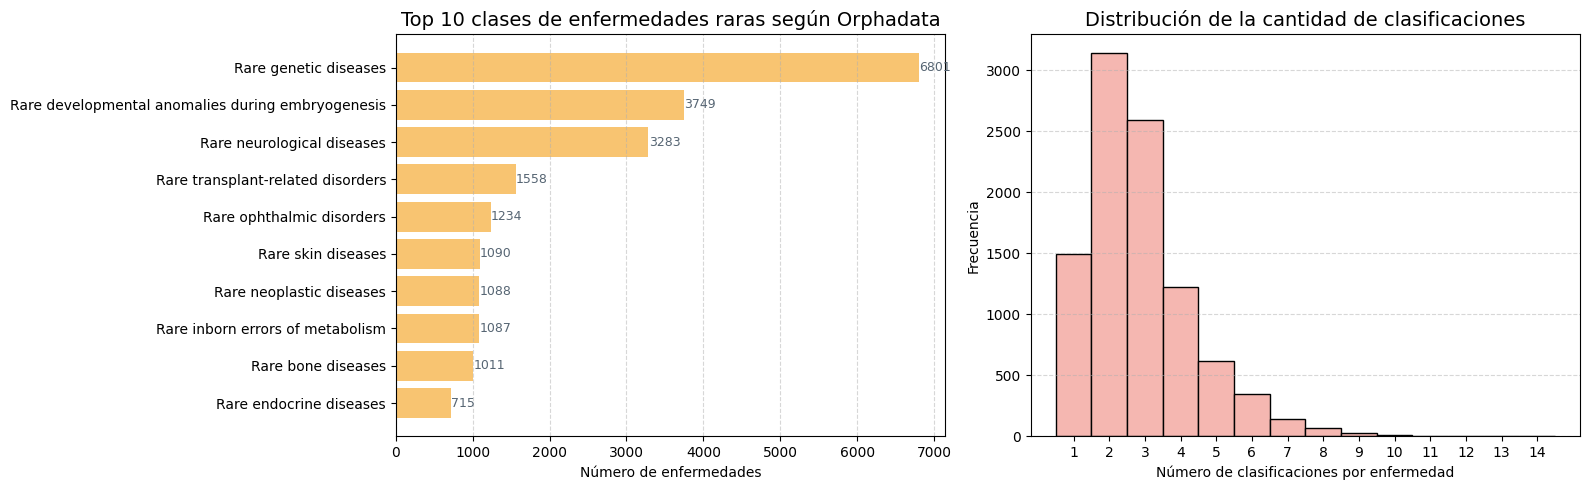

In [81]:
top_10_clases = clasificacion.groupby("clase")["nombre_enfermedad"].count().sort_values(ascending=False).head(10)
top_10_sorted = top_10_clases.sort_values()

# Crear figura con dos subplots horizontales
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Top 10
axes[0].barh(top_10_sorted.index, top_10_sorted.values, color="#f8c471")
axes[0].set_title("Top 10 clases de enfermedades raras según Orphadata", fontsize=14)
axes[0].set_xlabel("Número de enfermedades")
axes[0].set_ylabel("")
axes[0].grid(axis="x", linestyle="--", alpha=0.5)

# Etiquetas de valor
for i, v in enumerate(top_10_sorted.values):
    axes[0].text(v + 5, i, f"{v}", va='center', fontsize=9, color='#566573')

# Clasificaciones por enfermedad
axes[1].hist(
    conteo_clasificacion['cantidad_clasificaciones'],
    bins=bins,
    edgecolor='black',
    align='left',
    color='#f5b7b1'
)
axes[1].set_title('Distribución de la cantidad de clasificaciones', fontsize=14)
axes[1].set_xlabel('Número de clasificaciones por enfermedad')
axes[1].set_ylabel('Frecuencia')
axes[1].set_xticks(bins[:-1])
axes[1].grid(axis="y", linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()

##### Gráficas *epidemiologia*

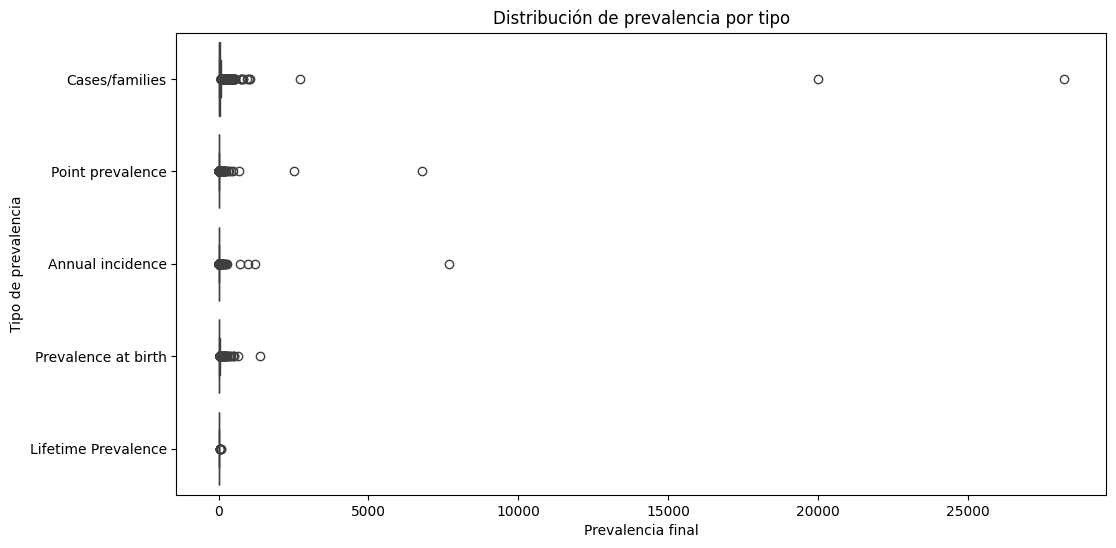

In [82]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=epidemiologia, y='prevalencia_tipo', x='prevalencia_final')
plt.xticks(rotation=0)
plt.title('Distribución de prevalencia por tipo')
plt.xlabel('Prevalencia final')
plt.ylabel('Tipo de prevalencia')
plt.show()

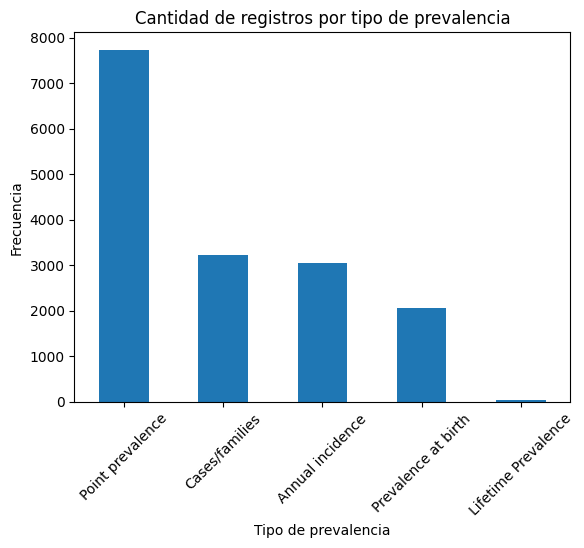

In [83]:
epidemiologia['prevalencia_tipo'].value_counts().plot(kind='bar')
plt.title('Cantidad de registros por tipo de prevalencia')
plt.xlabel('Tipo de prevalencia')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

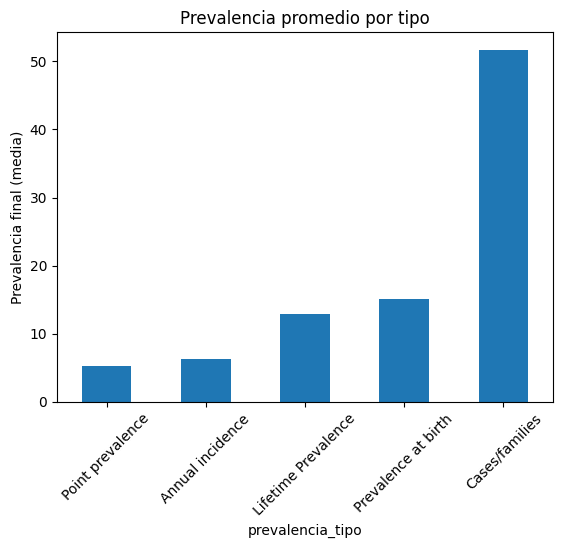

In [84]:
epidemiologia.dropna(subset=['prevalencia_final']).groupby('prevalencia_tipo')['prevalencia_final'].mean().sort_values().plot(kind='bar')
plt.title('Prevalencia promedio por tipo')
plt.ylabel('Prevalencia final (media)')
plt.xticks(rotation=45)
plt.show()

##### Gráficas *historia*

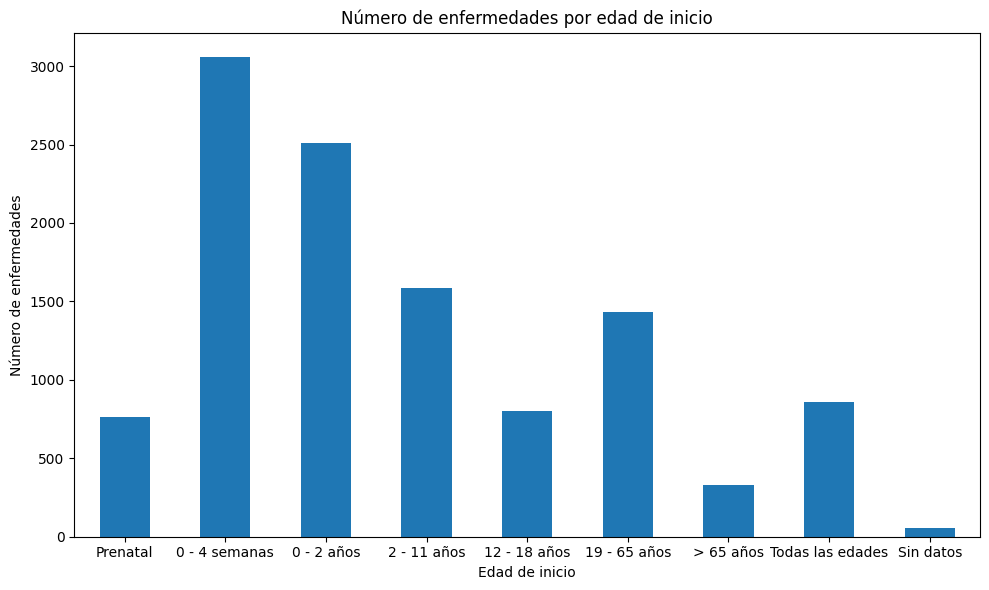

In [85]:
# Orden cronológico deseado
orden_etapas = [
    'Antenatal', 'Neonatal', 'Infancy', 'Childhood',
    'Adolescent', 'Adult', 'Elderly', 'All ages', 'No data available'
]

# Mapeo para nombres personalizados en el gráfico (opcional)
etiquetas_mostrar = {
    'Antenatal': 'Prenatal',
    'Neonatal': '0 - 4 semanas',
    'Infancy': '0 - 2 años',
    'Childhood': '2 - 11 años',
    'Adolescent': '12 - 18 años',
    'Adult': '19 - 65 años',
    'Elderly': '> 65 años',
    'All ages': 'Todas las edades',
    'No data available': 'Sin datos'
}

# Sumar cuántas enfermedades están marcadas para cada etapa
conteo_etapas = edad_inicio_binaria[orden_etapas].sum().rename(index=etiquetas_mostrar)

# Graficar
plt.figure(figsize=(10, 6))
conteo_etapas.plot(kind='bar')
plt.title('Número de enfermedades por edad de inicio')
plt.xlabel('Edad de inicio')
plt.ylabel('Número de enfermedades')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


##### Gráficas *genes*

Máximo número de genes asociados a una enfermedad: 108
ORPHAcode
528084    108
dtype: int64


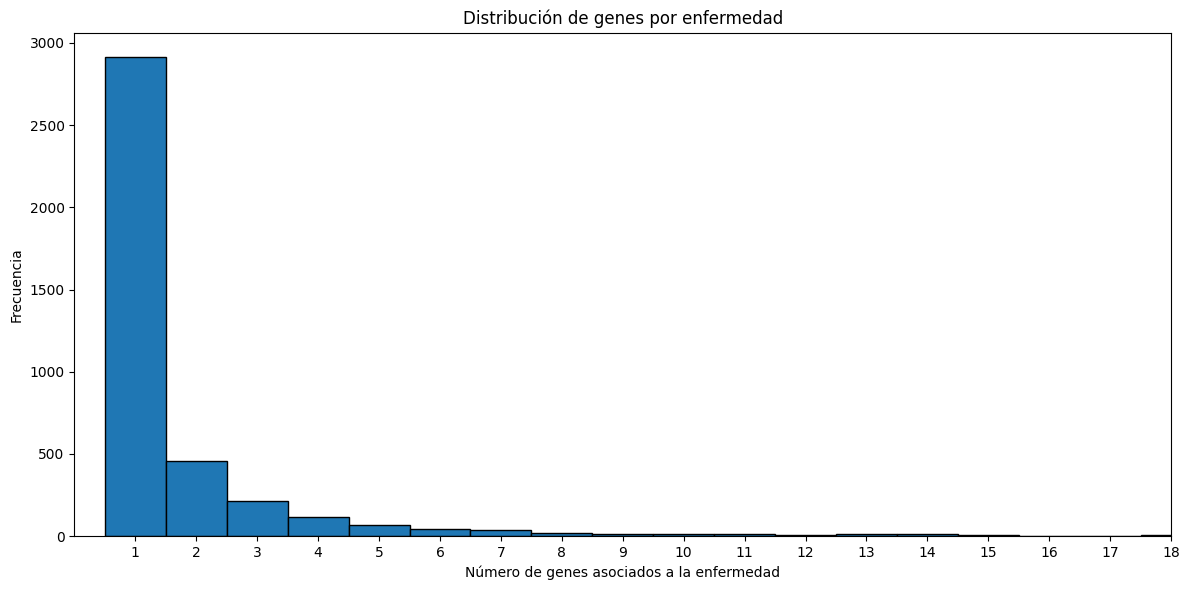

In [86]:
# Datos
genes_por_enfermedad = enfermedades_geneticas.groupby('ORPHAcode').size()
max_genes = genes_por_enfermedad.max()
print(f"Máximo número de genes asociados a una enfermedad: {max_genes}")
enfermedades_max_genes = genes_por_enfermedad[genes_por_enfermedad == max_genes]
print(enfermedades_max_genes)

# Crear bins de números enteros: desde 1 hasta el máximo + 1
max_genes = genes_por_enfermedad.max()
bins = np.arange(1, max_genes + 2)  # +2 porque el último bin es exclusivo

# Graficar
plt.figure(figsize=(12, 6))
plt.hist(genes_por_enfermedad, bins=bins, edgecolor='black', align='left')
plt.xticks(bins[:-1])  # Mostrar solo los enteros reales
plt.xlim(0, 18)
plt.xlabel('Número de genes asociados a la enfermedad')
plt.ylabel('Frecuencia')
plt.title('Distribución de genes por enfermedad')
plt.tight_layout()
plt.show()

In [87]:
"""Para tener el nombre de la enfermedad con más genes"""
max_genes_df = genes_por_enfermedad[genes_por_enfermedad == max_genes].reset_index()
max_genes_df.columns = ['ORPHAcode', 'num_genes']

max_genes_enf = max_genes_df.merge(enfermedades, on='ORPHAcode')
max_genes_enf['nombre_enfermedad']

0    Non-specific syndromic intellectual disability
Name: nombre_enfermedad, dtype: object

Máximo número de enfermedades asociados a un gen: 21
simbolo_gen
LMNA    21
TP53    21
dtype: int64


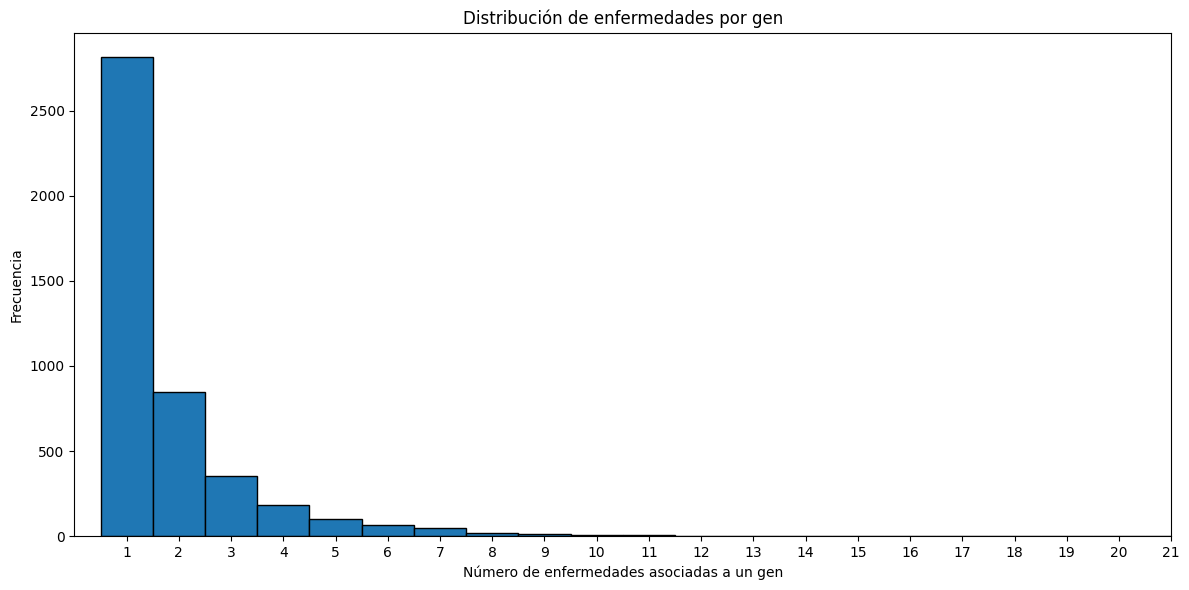

In [88]:
enfermedades_por_gen = enfermedades_geneticas.groupby('simbolo_gen').size()
max_enfermedades = enfermedades_por_gen.max()
print(f"Máximo número de enfermedades asociados a un gen: {max_enfermedades}")
genes_max_enfermedades = enfermedades_por_gen[enfermedades_por_gen == max_enfermedades]
print(genes_max_enfermedades)

# Crear bins de números enteros: desde 1 hasta el máximo + 1
max_enfermedades = enfermedades_por_gen.max()
bins = np.arange(1, max_enfermedades + 2)  # +2 porque el último bin es exclusivo

# Graficar
plt.figure(figsize=(12, 6))
plt.hist(enfermedades_por_gen, bins=bins, edgecolor='black', align='left')
plt.xticks(bins[:-1])  # Mostrar solo los enteros reales
plt.xlim(0, 21)
plt.xlabel('Número de enfermedades asociadas a un gen')
plt.ylabel('Frecuencia')
plt.title('Distribución de enfermedades por gen')
plt.tight_layout()
plt.show()

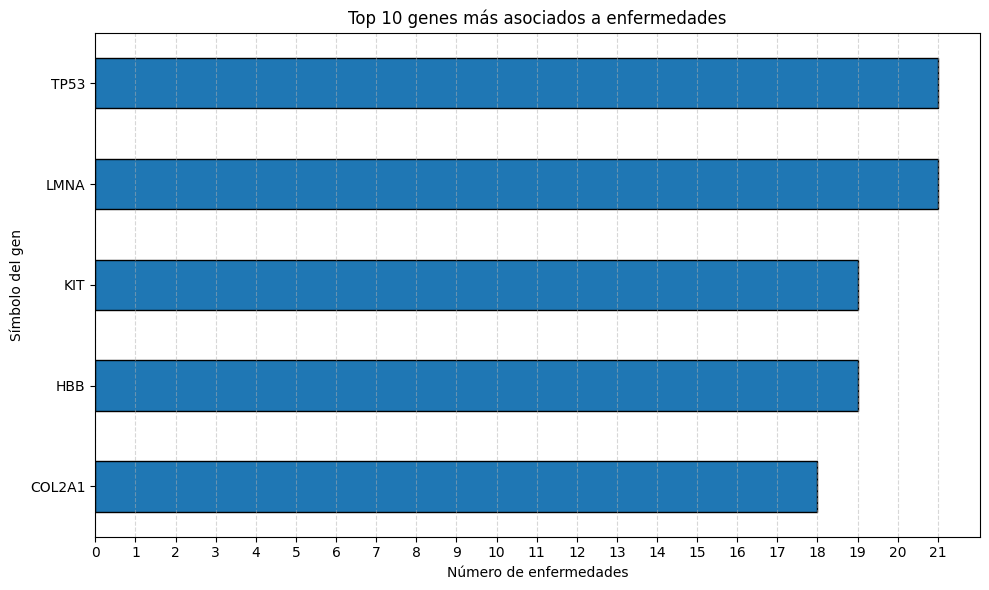

In [89]:
top_genes = enfermedades_por_gen.sort_values(ascending=False).head(5)
plt.figure(figsize=(10, 6))
top_genes.sort_values().plot(kind='barh', edgecolor='black')  # orden ascendente para que el top esté arriba

plt.title('Top 10 genes más asociados a enfermedades')
plt.xlabel('Número de enfermedades')
plt.ylabel('Símbolo del gen')
plt.xticks(ticks=range(0, top_genes.max()+1), labels=range(0, top_genes.max()+1))  # eje x como enteros
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

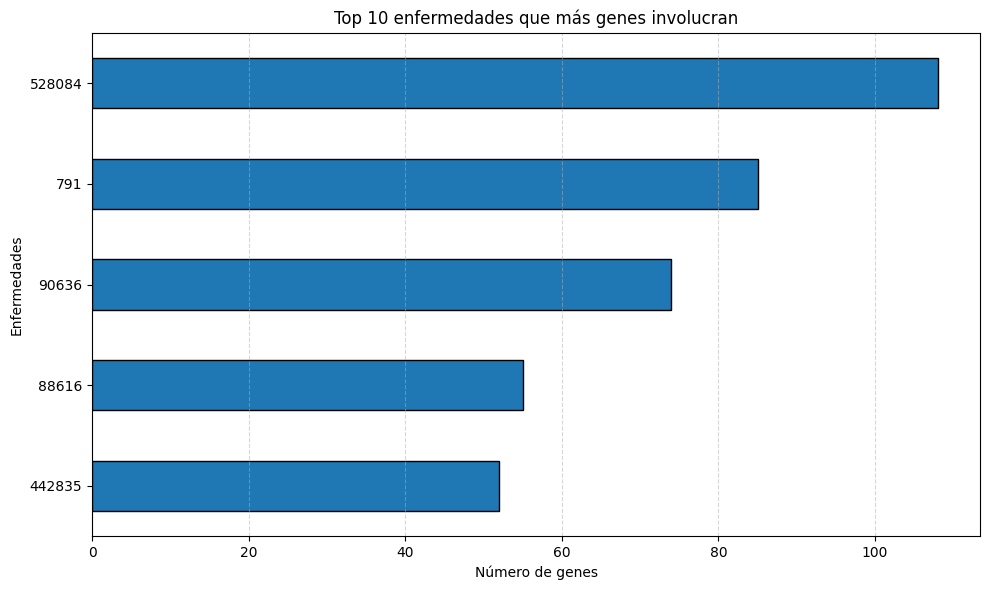

In [90]:
top_enfermedades = genes_por_enfermedad.sort_values(ascending=False).head(5)

plt.figure(figsize=(10, 6))
top_enfermedades.sort_values().plot(kind='barh', edgecolor='black')  # orden ascendente para que el top esté arriba

plt.title('Top 10 enfermedades que más genes involucran')
plt.xlabel('Número de genes')
plt.ylabel('Enfermedades')
#plt.xticks(ticks=range(0, top_enfermedades.max()+1), labels=range(0, top_enfermedades.max()+1))  # eje x como enteros
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

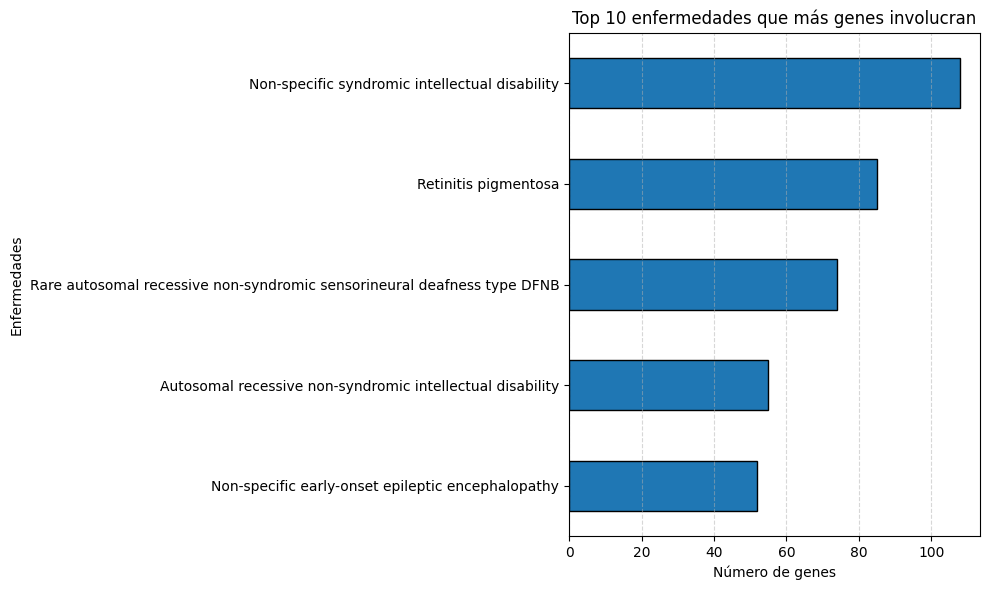

In [91]:
top_enfermedades = genes_por_enfermedad.sort_values(ascending=False).head(5).reset_index()
top_enfermedades.columns = ['ORPHAcode', 'num_genes']
top_enfermedades = top_enfermedades.merge(enfermedades, on='ORPHAcode', how='left')

# Usar los nombres como índice para graficar
top_enfermedades.set_index('nombre_enfermedad', inplace=True)

# Visualizar
plt.figure(figsize=(10, 6))
top_enfermedades['num_genes'].sort_values().plot(kind='barh', edgecolor='black')
plt.title('Top 10 enfermedades que más genes involucran')
plt.xlabel('Número de genes')
plt.ylabel('Enfermedades')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#### ¿Las enfermedades multigénicas son más prevalentes? --> no

In [92]:
# Suponiendo que 'epidemiologia' tiene 'ORPHAcode' y 'prevalencia_final'
multigen_prevalencia = genes_por_enfermedad.reset_index(name='num_genes').merge(
    epidemiologia[['ORPHAcode', 'prevalencia_tipo', 'prevalencia_final']], on='ORPHAcode', how='left'
)
multigen_prevalencia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8358 entries, 0 to 8357
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ORPHAcode          8358 non-null   Int64  
 1   num_genes          8358 non-null   int64  
 2   prevalencia_tipo   7720 non-null   object 
 3   prevalencia_final  6828 non-null   float64
dtypes: Int64(1), float64(1), int64(1), object(1)
memory usage: 269.5+ KB


In [93]:
def clasificar_genetica(n):
    if n == 1:
        return 'Monogénica'
    elif 2 <= n <= 5:
        return 'Oligogénica'
    else:
        return 'Multigénica'

multigen_prevalencia['categoria_gen'] = multigen_prevalencia['num_genes'].apply(clasificar_genetica)

#### Relación enfermedades genéticas y los fenotipos

In [94]:
enfermedades_geneticas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8193 entries, 0 to 8192
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ORPHAcode    8193 non-null   Int64 
 1   simbolo_gen  8193 non-null   object
 2   nombre_gen   8191 non-null   object
dtypes: Int64(1), object(2)
memory usage: 200.2+ KB


In [95]:
enfermedades_fenotipos = fenotipos_final.copy()
enfermedades_fenotipos.drop(columns=['frecuencia'], inplace=True)
enfermedades_fenotipos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114961 entries, 0 to 114960
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   ORPHAcode    114961 non-null  int64 
 1   fenotipo_id  114961 non-null  object
 2   fenotipo     114961 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.6+ MB


In [96]:
# junto ambas tablas: enfermedades, fenotipos y genes
df_fenotipo_genes = enfermedades_fenotipos.merge(enfermedades_geneticas, on='ORPHAcode', how='inner')
df_fenotipo_genes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171249 entries, 0 to 171248
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   ORPHAcode    171249 non-null  int64 
 1   fenotipo_id  171249 non-null  object
 2   fenotipo     171249 non-null  object
 3   simbolo_gen  171249 non-null  object
 4   nombre_gen   171242 non-null  object
dtypes: int64(1), object(4)
memory usage: 6.5+ MB


Si lo que quiero es estudiar la complejidad de las enfermedades, puedo tratar de ver si las que tienen más fenotipos asociados también tienen más genes implicados

In [97]:
# Conteo de fenotipos por enfermedad
fenotipos_por_enf = df_fenotipo_genes.groupby('ORPHAcode')['fenotipo_id'].nunique()

# Conteo de genes por enfermedad
genes_por_enf = df_fenotipo_genes.groupby('ORPHAcode')['simbolo_gen'].nunique()

# Unimos ambos conteos en un solo DataFrame
df_complejidad = pd.DataFrame({
    'num_fenotipos': fenotipos_por_enf,
    'num_genes': genes_por_enf
}).reset_index()
df_complejidad

,ORPHAcode,num_fenotipos,num_genes
0,5,25,1
1,6,10,2
2,7,64,4
3,13,31,1
4,14,63,1
...,...,...,...
2422,589905,38,1
2423,592574,44,1
2424,599373,31,1
2425,647799,64,1


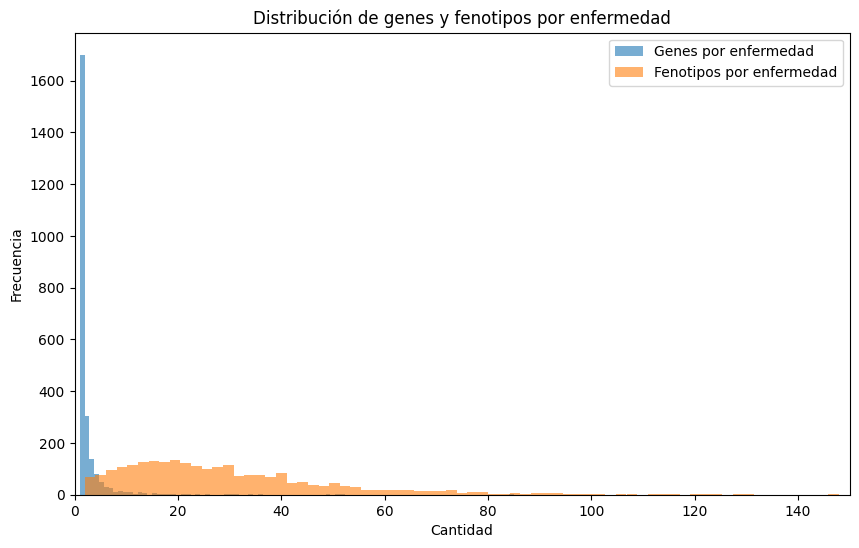

In [98]:
plt.figure(figsize=(10, 6))
plt.hist(df_complejidad['num_genes'], bins=90, alpha=0.6, label='Genes por enfermedad')
plt.hist(df_complejidad['num_fenotipos'], bins=90, alpha=0.6, label='Fenotipos por enfermedad')
plt.legend()
plt.xlim(0, 150)
plt.xlabel("Cantidad")
plt.ylabel("Frecuencia")
plt.title("Distribución de genes y fenotipos por enfermedad")
plt.show()

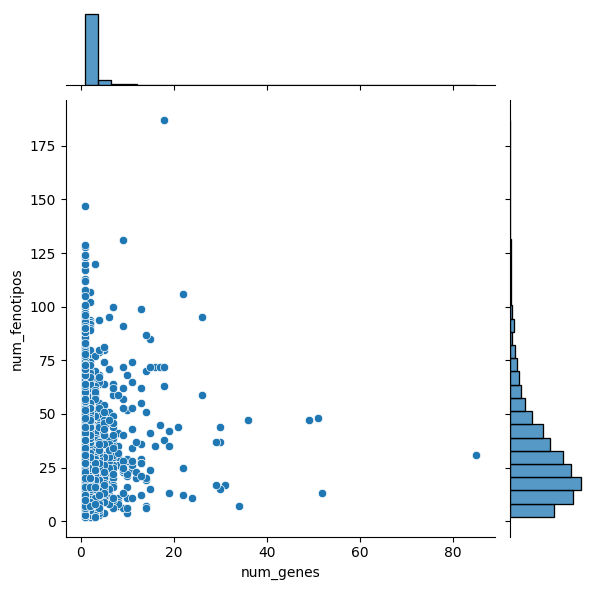

In [99]:
import seaborn as sns

sns.jointplot(
    data=df_complejidad, x="num_genes", y="num_fenotipos",
    kind="scatter", marginal_kws=dict(bins=30, fill=True)
)

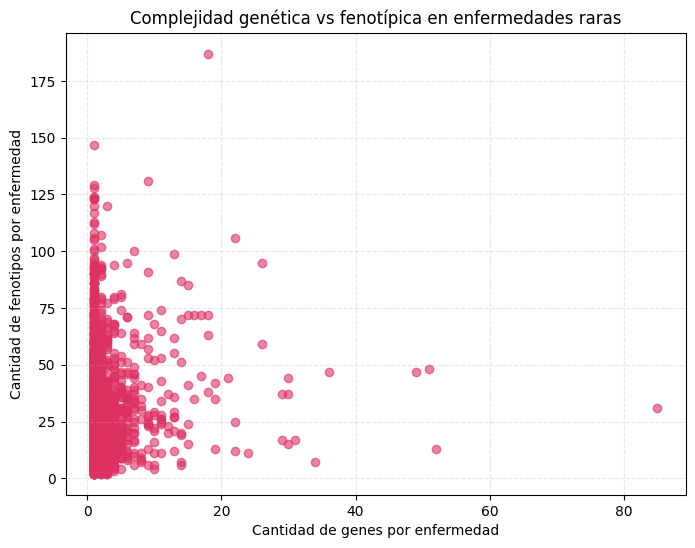

In [100]:
plt.figure(figsize=(8, 6))
plt.scatter(df_complejidad['num_genes'], df_complejidad['num_fenotipos'], alpha=0.6, color='#DE3163')
plt.xlabel("Cantidad de genes por enfermedad")
plt.ylabel("Cantidad de fenotipos por enfermedad")
plt.title("Complejidad genética vs fenotípica en enfermedades raras")
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

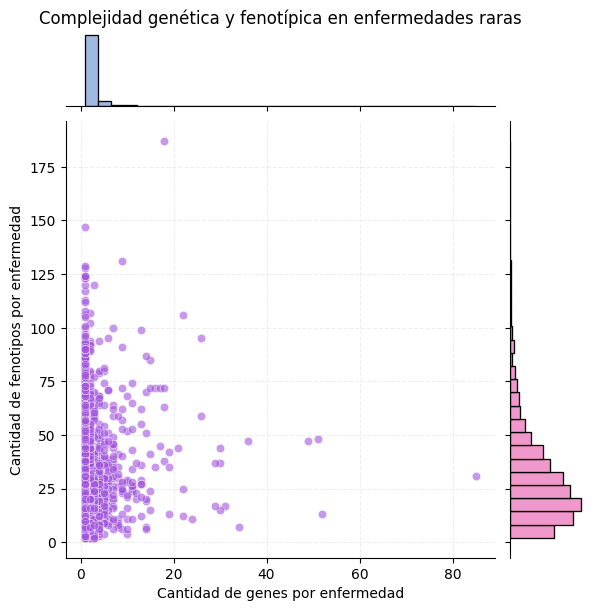

In [101]:
g = sns.jointplot(
    data=df_complejidad,
    x="num_genes",
    y="num_fenotipos",
    kind="scatter",
    marginal_kws=dict(bins=30, fill=True),
    color='#a052de',
    alpha=0.6
)

# Personalizamos los ejes y el título
g.ax_joint.set_xlabel("Cantidad de genes por enfermedad")
g.ax_joint.set_ylabel("Cantidad de fenotipos por enfermedad")
g.ax_joint.set_title("Complejidad genética y fenotípica en enfermedades raras", pad=70)
g.ax_joint.grid(True, linestyle='--', alpha=0.2)

# Colorear histogramas marginales
# Superior (x) → genes → azul
for patch in g.ax_marg_x.patches:
    patch.set_facecolor('#9fb9e2')

# Derecho (y) → fenotipos → rosado
for patch in g.ax_marg_y.patches:
    patch.set_facecolor('#f098cb')

#plt.tight_layout()
plt.show()

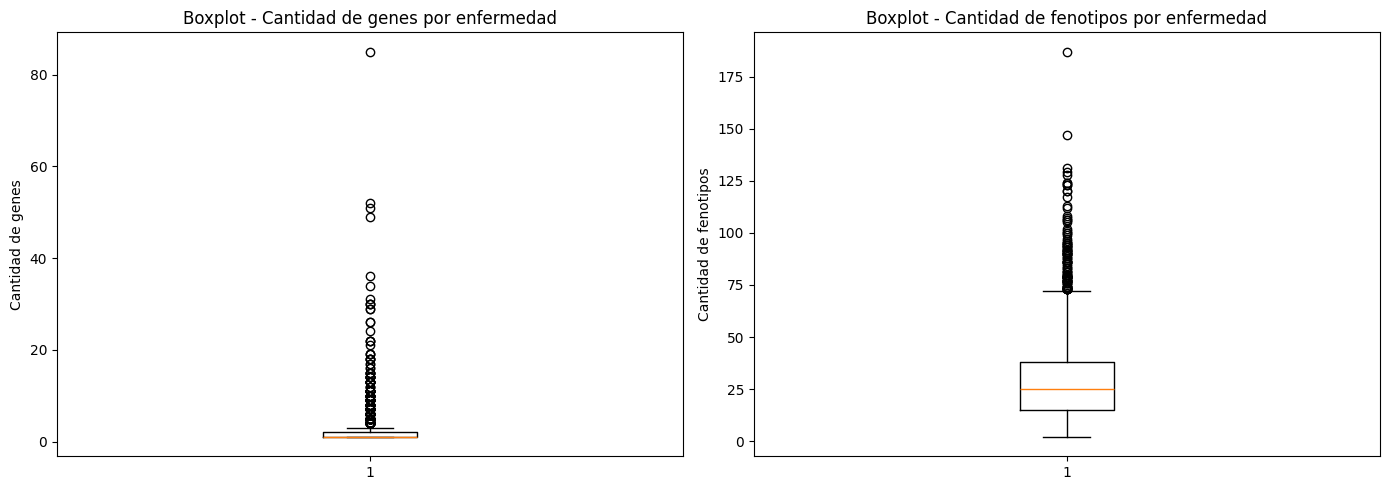

In [102]:
"""Para ver si hay muchos outliers --> boxplots"""

fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Boxplot para cantidad de genes
axs[0].boxplot(df_complejidad['num_genes'], vert=True)
axs[0].set_title('Boxplot - Cantidad de genes por enfermedad')
axs[0].set_ylabel('Cantidad de genes')

# Boxplot para cantidad de fenotipos
axs[1].boxplot(df_complejidad['num_fenotipos'], vert=True)
axs[1].set_title('Boxplot - Cantidad de fenotipos por enfermedad')
axs[1].set_ylabel('Cantidad de fenotipos')

plt.tight_layout()
plt.show()

In [103]:
"""Muchso outliers, puedo evaluar la correlación con Spearman"""
from scipy.stats import spearmanr

spearman_corr= spearmanr(df_complejidad['num_genes'], df_complejidad['num_fenotipos'])
print("Correlación: ", round(spearman_corr.statistic, 4))

Correlación:  0.0392
